<a href="https://colab.research.google.com/github/KatiaOrtegon/ProyectoBEDU/blob/main/ML_PharmaProyect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Modelo indicativo de venta de farmacos que nos mencione qué productos son mas vendidos durante el paso de los años**


## **Estimados de Locacion y Variabilidad**

En esta primera sección se tratan de tener los estimados de locación y variabilidad en nuestros datos los cuales nos dan una vista de lo que tenemos los cuales vammos a requerir para trabajar análisis más precisos de nuestros datos más adelante.

In [262]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [263]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import numpy as np
from scipy.stats import trim_mean
from scipy.stats import skew, kurtosis

In [264]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto_BEDU/salesmonthly.csv')

Las variables a trabajar son las siguientes (están medidas por volúmenes):


*   M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
*   M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives


*   N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives

*   N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides
*   N05B - Psycholeptics drugs, Anxiolytic drugs


*   N05C - Psycholeptics drugs, Hypnotics and sedatives drugs



*   R03 - Drugs for obstructive airway diseases
*   R06 - Antihistamines for systemic use






In [265]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


Aquí nos aseguramos de saber qué tipo de datos estamos manejando en el dataset, y nos damos cuenta que todos son tipo float a excepción de las fechas que son tipo object.

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   70 non-null     object 
 1   M01AB   70 non-null     float64
 2   M01AE   70 non-null     float64
 3   N02BA   70 non-null     float64
 4   N02BE   70 non-null     float64
 5   N05B    70 non-null     float64
 6   N05C    70 non-null     float64
 7   R03     70 non-null     float64
 8   R06     70 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.0+ KB


In [267]:
fechas = pd.to_datetime(df['datum'])

In [268]:
df['datum'] = fechas

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   datum   70 non-null     datetime64[ns]
 1   M01AB   70 non-null     float64       
 2   M01AE   70 non-null     float64       
 3   N02BA   70 non-null     float64       
 4   N02BE   70 non-null     float64       
 5   N05B    70 non-null     float64       
 6   N05C    70 non-null     float64       
 7   R03     70 non-null     float64       
 8   R06     70 non-null     float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 5.0 KB


In [270]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


Promedio de las columnas con datos númericos donde prácticamente son casí todas las columnas porque no cocntamos con variables categorícas

In [271]:
#Función para el promedio
def promedio(serie):
  suma = sum(serie)
  elementos = serie.count()
  return suma  / elementos

In [272]:
#Promedio por columna
prom_M01AB = promedio(df['M01AB'])
prom_M01AE = promedio(df['M01AE'])
prom_N02BA = promedio(df['N02BA'])
prom_N02BE = promedio(df['N02BE'])
prom_N05B = promedio(df['N05B'])
prom_N05C = promedio(df['N05C'])
prom_R03 = promedio(df['R03'])
prom_R06 = promedio(df['R06'])

In [273]:
#Impresión del promedio
print(prom_M01AB)
print(prom_M01AE)
print(prom_N02BA)
print(prom_N02BE)
print(prom_N05B)
print(prom_N05C)
print(prom_R03)
print(prom_R06)

149.99200000000005
116.51428571428576
115.0208428571428
892.5420714285715
262.11857142857144
17.84285714285714
167.675
86.66257142857144


Mediana de las columnas con datos númerico, esto para tener en cuenta el dato que se ubica justo en el centro de cada una de las columnas

In [274]:
#Mediana por columna
med_M01AB = df['M01AB'].median()
med_M01AE = df['M01AE'].median()
med_N02BA = df['N02BA'].median()
med_N02BE = df['N02BE'].median()
med_N05B = df['N05B'].median()
med_N05C = df['N05C'].median()
med_R03 = df['R03'].median()
med_R06 = df['R06'].median()

In [275]:
#Impresión de la mediana
print(med_M01AB)
print(med_M01AE)
print(med_N02BA)
print(med_N02BE)
print(med_N05B)
print(med_N05C)
print(med_R03)
print(med_R06)

154.63500000000005
114.84000000000002
117.225
865.8245000000002
250.3
18.0
160.0
74.1


Media truncada de las columnas, aquí se quitaron el 10% de los datos siendo 5% a la derecha y 5% a la izquierda, para posteriormente truncar el promedio de los datos restantes sin ese 10%

In [276]:
med_truncada_M01AB = trim_mean(df['M01AB'], proportiontocut=0.1)
med_truncada_M01AE = trim_mean(df['M01AE'], proportiontocut=0.1)
med_truncada_N02BA = trim_mean(df['N02BA'], proportiontocut=0.1)
med_truncada_N02BE = trim_mean(df['N02BE'], proportiontocut=0.1)
med_truncada_N05B = trim_mean(df['N05B'], proportiontocut=0.1)
med_truncada_N05C = trim_mean(df['N05C'], proportiontocut=0.1)
med_truncada_R03 = trim_mean(df['R03'], proportiontocut=0.1)
med_truncada_R06 = trim_mean(df['R06'], proportiontocut=0.1)

In [277]:
print(med_truncada_M01AB)
print(med_truncada_M01AE)
print(med_truncada_N02BA)
print(med_truncada_N02BE)
print(med_truncada_N05B)
print(med_truncada_N05C)
print(med_truncada_R03)
print(med_truncada_R06)

152.88125000000005
116.09146428571432
115.6814107142857
867.5638214285716
257.0232142857143
17.375
163.21875
82.83285714285714


Desviación estandar de las columnas, esto es de suma importancia ya que nos indica una variación de los datos sobre el promedio, la cual más adelante vamos a poder observar gráficamente

In [278]:
#Desviación estandar por columna
std_M01AB = df['M01AB'].std()
std_M01AE = df['M01AE'].std()
std_N02BA = df['N02BA'].std()
std_N02BE = df['N02BE'].std()
std_N05B = df['N05B'].std()
std_N05C = df['N05C'].std()
std_R03 = df['R03'].std()
std_R06 = df['R06'].std()

In [279]:
#Impresión de la desviación estandar
print(std_M01AB)
print(std_M01AE)
print(std_N02BA)
print(std_N02BE)
print(std_N05B)
print(std_N05C)
print(std_R03)
print(std_R06)

31.48532534188045
27.88933638723022
31.24589865057804
338.84390820494855
85.06093006790228
8.481242242696293
81.76797934186814
45.85933551809806


Percentiles 25 y 75

In [280]:
#Percentil 25
percentil_25_M01AB = df['M01AB'].quantile(0.25)
percentil_25_M01AE = df['M01AE'].quantile(0.25)
percentil_25_N02BA = df['N02BA'].quantile(0.25)
percentil_25_N02BE = df['N02BE'].quantile(0.25)
percentil_25_N05B = df['N05B'].quantile(0.25)
percentil_25_N05C = df['N05C'].quantile(0.25)
percentil_25_R03 = df['R03'].quantile(0.25)
percentil_25_R06 = df['R06'].quantile(0.25)

In [281]:
#Impresión del percentil 25
print(percentil_25_M01AB)
print(percentil_25_M01AE)
print(percentil_25_N02BA)
print(percentil_25_N02BE)
print(percentil_25_N05B)
print(percentil_25_N05C)
print(percentil_25_R03)
print(percentil_25_R06)

137.49
103.51825
94.375
648.1875000000001
223.75
12.0
112.0
49.875


In [282]:
#Percentil 75
percentil_75_M01AB = df['M01AB'].quantile(0.75)
percentil_75_M01AE = df['M01AE'].quantile(0.75)
percentil_75_N02BA = df['N02BA'].quantile(0.75)
percentil_75_N02BE = df['N02BE'].quantile(0.75)
percentil_75_N05B = df['N05B'].quantile(0.75)
percentil_75_N05C = df['N05C'].quantile(0.75)
percentil_75_R03 = df['R03'].quantile(0.75)
percentil_75_R06 = df['R06'].quantile(0.75)

In [283]:
#Impresión del percentil 75
print(percentil_75_M01AB)
print(percentil_75_M01AE)
print(percentil_75_N02BA)
print(percentil_75_N02BE)
print(percentil_75_N05B)
print(percentil_75_N05C)
print(percentil_75_R03)
print(percentil_75_R06)

169.00000000000003
128.35975
133.83750000000003
1061.5800000000004
293.65
23.0
218.25
119.8075


Rango

Aquí no se concluye nada sobre los datos, simplemente se saco un rango con el promedio y una desviación estandar para tener un limite inferior y superior de dicho rango

In [284]:
#Columna M01AB
limite_inferior = prom_M01AB - std_M01AB
limite_superior = prom_M01AB + std_M01AB
print(limite_inferior, limite_superior)

118.50667465811959 181.4773253418805


In [285]:
#Columna M01AE
limite_inferior = prom_M01AE - std_M01AE
limite_superior = prom_M01AE + std_M01AE
print(limite_inferior, limite_superior)

88.62494932705555 144.403622101516


In [286]:
#Columna N02BA
limite_inferior = prom_N02BA - std_N02BA
limite_superior = prom_N02BA + std_N02BA
print(limite_inferior, limite_superior)

83.77494420656475 146.26674150772084


In [287]:
#Columna N02BE
limite_inferior = prom_N02BE - std_N02BE
limite_superior = prom_N02BE + std_N02BE
print(limite_inferior, limite_superior)

553.6981632236229 1231.38597963352


In [288]:
#Columna N05B
limite_inferior = prom_N05B - std_N05B
limite_superior = prom_N05B + std_N05B
print(limite_inferior, limite_superior)

177.05764136066915 347.17950149647373


In [289]:
#Columna N05C
limite_inferior = prom_N05C - std_N05C
limite_superior = prom_N05C + std_N05C
print(limite_inferior, limite_superior)

9.361614900160848 26.324099385553435


In [290]:
#Columna R03
limite_inferior = prom_R03 - std_R03
limite_superior = prom_R03 + std_R03
print(limite_inferior, limite_superior)

85.90702065813187 249.44297934186815


In [291]:
#Columna R06
limite_inferior = prom_R06 - std_R06
limite_superior = prom_R06 + std_R06
print(limite_inferior, limite_superior)

40.80323591047338 132.5219069466695


Rango Intercuartil

Aquí nuevamente solo se obtiene el rango con el quartil 25 y 75, aún no se busca sacar conclusiones con los datos sobre algún filtro

In [292]:
#Columna M01AB
Q1 = df['M01AB'].quantile(0.25)
Q3 = df['M01AB'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

31.51000000000002


In [293]:
#Columna M01AE
Q1 = df['M01AE'].quantile(0.25)
Q3 = df['M01AE'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

24.841499999999996


In [294]:
#Columna N02BA
Q1 = df['N02BA'].quantile(0.25)
Q3 = df['N02BA'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

39.462500000000034


In [295]:
#Columna N02BE
Q1 = df['N02BE'].quantile(0.25)
Q3 = df['N02BE'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

413.39250000000027


In [296]:
#Columna N05B
Q1 = df['N05B'].quantile(0.25)
Q3 = df['N05B'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

69.89999999999998


In [297]:
#Columna N05C
Q1 = df['N05C'].quantile(0.25)
Q3 = df['N05C'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

11.0


In [298]:
#Columna R03
Q1 = df['R03'].quantile(0.25)
Q3 = df['R03'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

106.25


In [299]:
#Columna R06
Q1 = df['R06'].quantile(0.25)
Q3 = df['R06'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

69.9325


## **Introducción a la visualización de datos: Distribuciones**

In [300]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


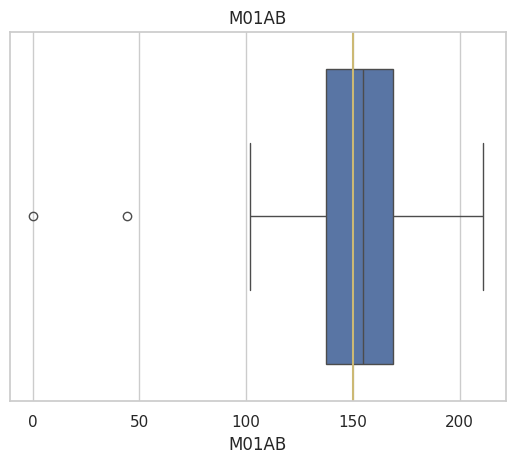

In [301]:
#BOXPLOT
sns.set(style="whitegrid")
sns.boxplot(x=df['M01AB'])
plt.title('M01AB')
plt.axvline(df['M01AB'].mean(),c='y')

#Nuestros valores para este farmaco se concentran en un rango de los 130-170, con rangos atípicos en el rango de los 0-50
#Mediana se centra cerca de los 150, que se corrobora con el valor obtenido de la mediana: 154.6350

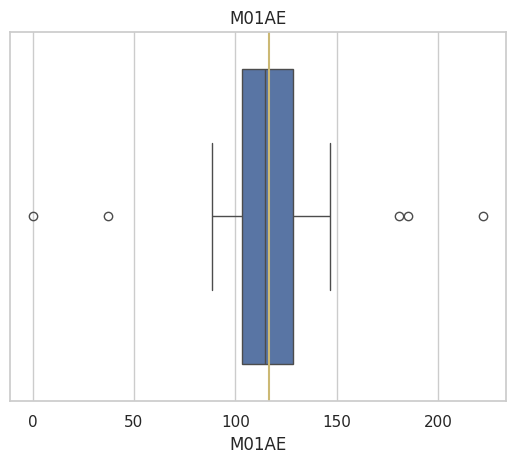

In [302]:
sns.set(style="whitegrid")
sns.boxplot(x=df['M01AE'])
plt.title('M01AE')
plt.axvline(df['M01AE'].mean(),c='y')

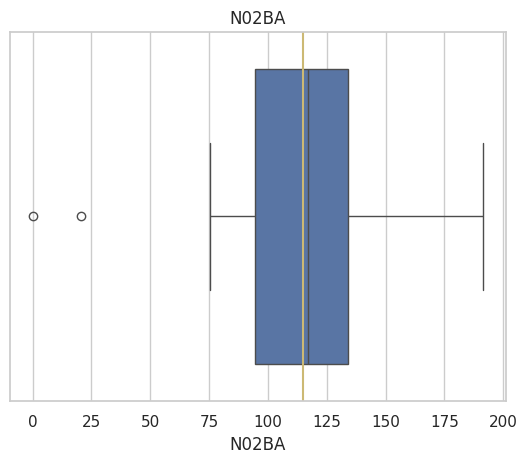

In [303]:
sns.set(style="whitegrid")
sns.boxplot(x=df['N02BA'])
plt.title('N02BA')
plt.axvline(df['N02BA'].mean(),c='y')

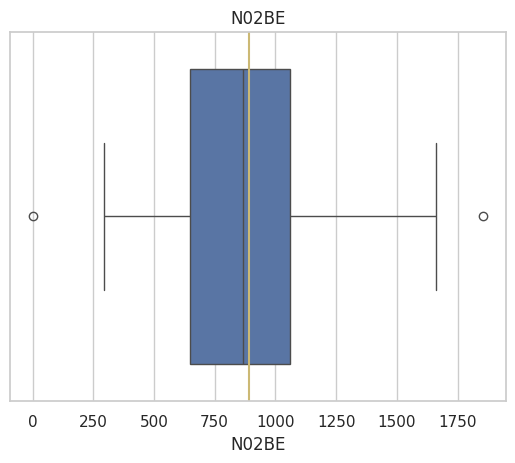

In [304]:
sns.set(style="whitegrid")
sns.boxplot(x=df['N02BE'])
plt.title('N02BE')
plt.axvline(df['N02BE'].mean(),c='y')

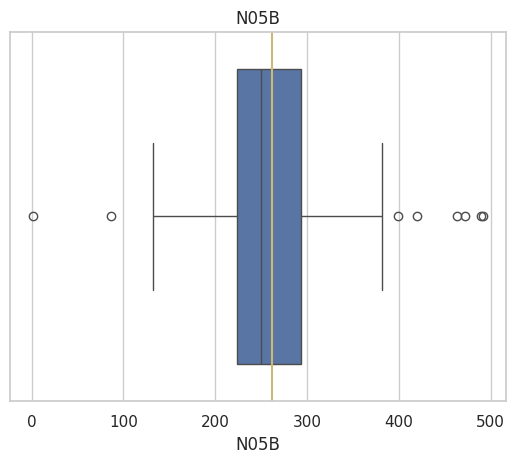

In [305]:
sns.set(style="whitegrid")
sns.boxplot(x=df['N05B'])
plt.title('N05B')
plt.axvline(df['N05B'].mean(),c='y')

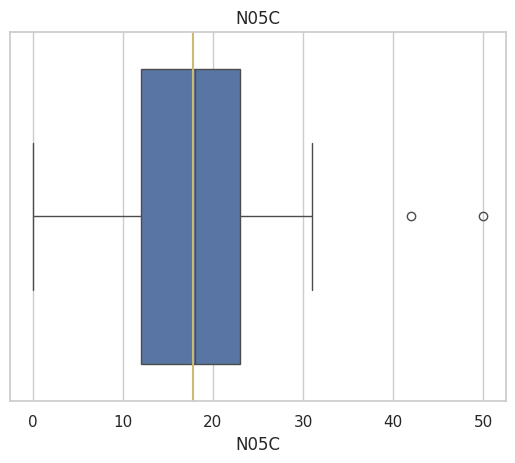

In [306]:
sns.set(style="whitegrid")
sns.boxplot(x=df['N05C'])
plt.title('N05C')
plt.axvline(df['N05C'].mean(),c='y')

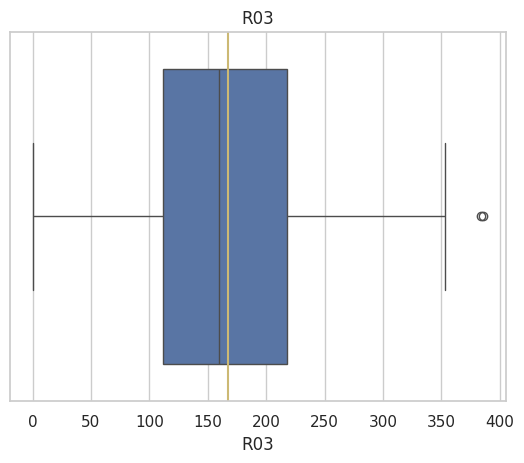

In [307]:
sns.set(style="whitegrid")
sns.boxplot(x=df['R03'])
plt.title('R03')
plt.axvline(df['R03'].mean(),c='y')

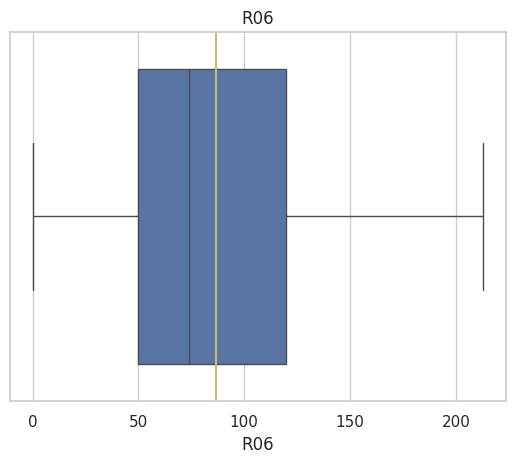

In [308]:
sns.set(style="whitegrid")
sns.boxplot(x=df['R06'])
plt.title('R06')
plt.axvline(df['R06'].mean(),c='y')
#linea gris representa la media

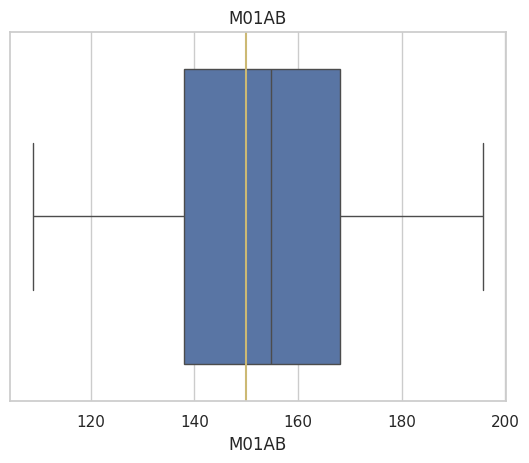

In [309]:
#Rango Intercuartílico y Valores atípicos
#Eliminar valores atípicos
Q1=df['M01AB'].quantile(0.25)
Q3=df['M01AB'].quantile(0.75)
IQR= Q3 - Q1
filtro_inferior =df['M01AB']> df['M01AB'].quantile(0.25) - (IQR + 1.5)
filtro_superior =df['M01AB']< df['M01AB'].quantile(0.75) + (IQR + 1.5)
df_filtrado= df[filtro_inferior & filtro_superior]
sns.boxplot(df_filtrado['M01AB'], orient='h')
plt.title('M01AB')
plt.axvline(df['M01AB'].mean(),c='y')

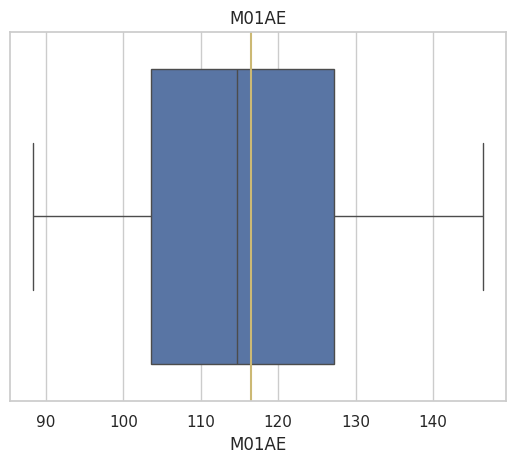

In [310]:
Q1=df['M01AE'].quantile(0.25)
Q3=df['M01AE'].quantile(0.75)
IQR= Q3 - Q1
filtro_inferior =df['M01AE']> df['M01AE'].quantile(0.25) - (IQR + 1.5)
filtro_superior =df['M01AE']< df['M01AE'].quantile(0.75) + (IQR + 1.5)
df_filtrado= df[filtro_inferior & filtro_superior]
sns.boxplot(df_filtrado['M01AE'], orient='h')
plt.title('M01AE')
plt.axvline(df['M01AE'].mean(),c='y')

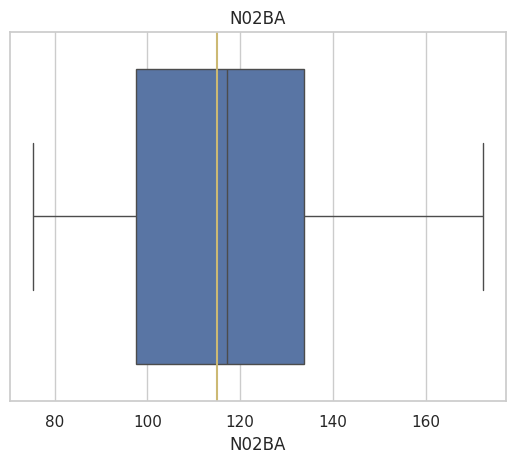

In [311]:
Q1=df['N02BA'].quantile(0.25)
Q3=df['N02BA'].quantile(0.75)
IQR= Q3 - Q1
filtro_inferior =df['N02BA']> df['N02BA'].quantile(0.25) - (IQR + 1.5)
filtro_superior =df['N02BA']< df['N02BA'].quantile(0.75) + (IQR + 1.5)
df_filtrado= df[filtro_inferior & filtro_superior]
sns.boxplot(df_filtrado['N02BA'], orient='h')
plt.title('N02BA')
plt.axvline(df['N02BA'].mean(),c='y')

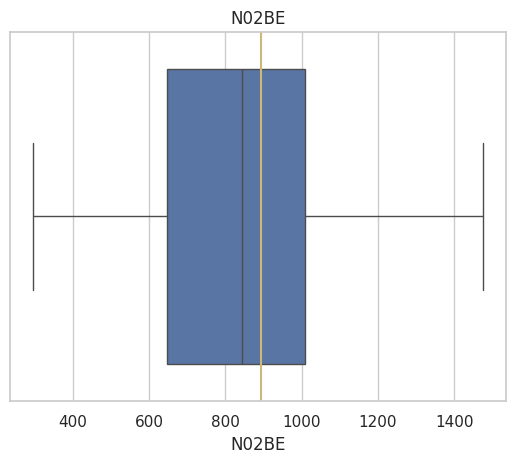

In [312]:
Q1=df['N02BE'].quantile(0.25)
Q3=df['N02BE'].quantile(0.75)
IQR= Q3 - Q1
filtro_inferior =df['N02BE']> df['N02BE'].quantile(0.25) - (IQR + 1.5)
filtro_superior =df['N02BE']< df['N02BE'].quantile(0.75) + (IQR + 1.5)
df_filtrado= df[filtro_inferior & filtro_superior]
sns.boxplot(df_filtrado['N02BE'], orient='h')
plt.title('N02BE')
plt.axvline(df['N02BE'].mean(),c='y')

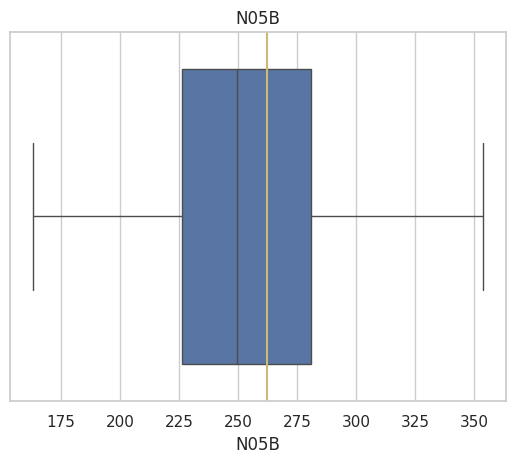

In [313]:
Q1=df['N05B'].quantile(0.25)
Q3=df['N05B'].quantile(0.75)
IQR= Q3 - Q1
filtro_inferior =df['N05B']> df['N05B'].quantile(0.25) - (IQR + 1.5)
filtro_superior =df['N05B']< df['N05B'].quantile(0.75) + (IQR + 1.5)
df_filtrado= df[filtro_inferior & filtro_superior]
sns.boxplot(df_filtrado['N05B'], orient='h')
plt.title('N05B')
plt.axvline(df['N05B'].mean(),c='y')

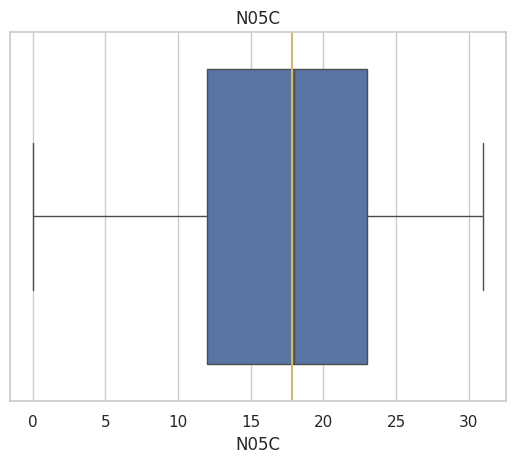

In [314]:
Q1=df['N05C'].quantile(0.25)
Q3=df['N05C'].quantile(0.75)
IQR= Q3 - Q1
filtro_inferior =df['N05C']> df['N05C'].quantile(0.25) - (IQR + 1.5)
filtro_superior =df['N05C']< df['N05C'].quantile(0.75) + (IQR + 1.5)
df_filtrado= df[filtro_inferior & filtro_superior]
sns.boxplot(df_filtrado['N05C'], orient='h')
plt.title('N05C')
plt.axvline(df['N05C'].mean(),c='y')

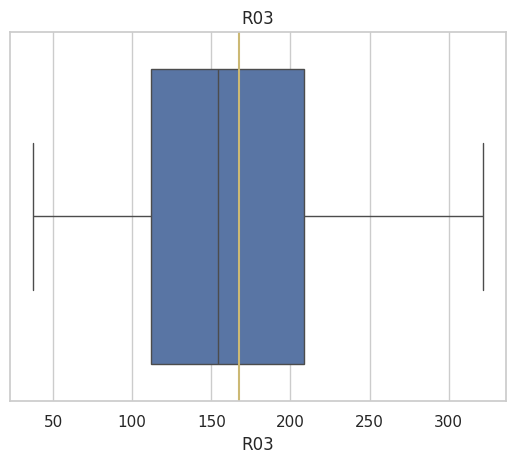

In [315]:
Q1=df['R03'].quantile(0.25)
Q3=df['R03'].quantile(0.75)
IQR= Q3 - Q1
filtro_inferior =df['R03']> df['R03'].quantile(0.25) - (IQR + 1.5)
filtro_superior =df['R03']< df['R03'].quantile(0.75) + (IQR + 1.5)
df_filtrado= df[filtro_inferior & filtro_superior]
sns.boxplot(df_filtrado['R03'], orient='h')
plt.title('R03')
plt.axvline(df['R03'].mean(),c='y')

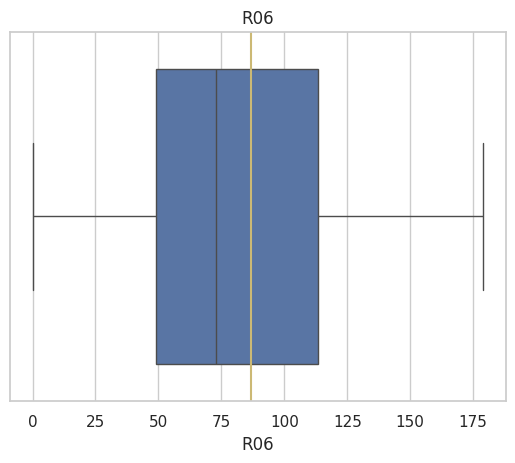

In [316]:
Q1=df['R06'].quantile(0.25)
Q3=df['R06'].quantile(0.75)
IQR= Q3 - Q1
filtro_inferior =df['R06']> df['R06'].quantile(0.25) - (IQR + 1.5)
filtro_superior =df['R06']< df['R06'].quantile(0.75) + (IQR + 1.5)
df_filtrado= df[filtro_inferior & filtro_superior]
sns.boxplot(df_filtrado['R06'], orient='h')
plt.title('R06')
plt.axvline(df['R06'].mean(),c='y')

NOTA: En los histogramas en todos se coloco la estimación de densidad kernel sin embargo se trabajo sobre los valores reales y no tomando el total como 1, lo cual en estos casos es lo más correcto pero debido a que como no son variables categóricas lo que más se buscaba resaltar era la cantidad real entonces decidimos manejarlo de esta forma, nos percatamos hasta el final que realizamos mal la colocación en los puntos x, y debido a que no se centra en las ventas por pieza el si no sobre los volúmenes de ventas, vamos a corregir esta parte creando histogramas en cada cierto rango de fechas las cuales son las que deben ir en el eje x siendo los volúmenes en el eje y para así notar las variaciones de ventas en cada año.

Curtosis: 7.209981721838828
Asimetria: -1.9636015401456492


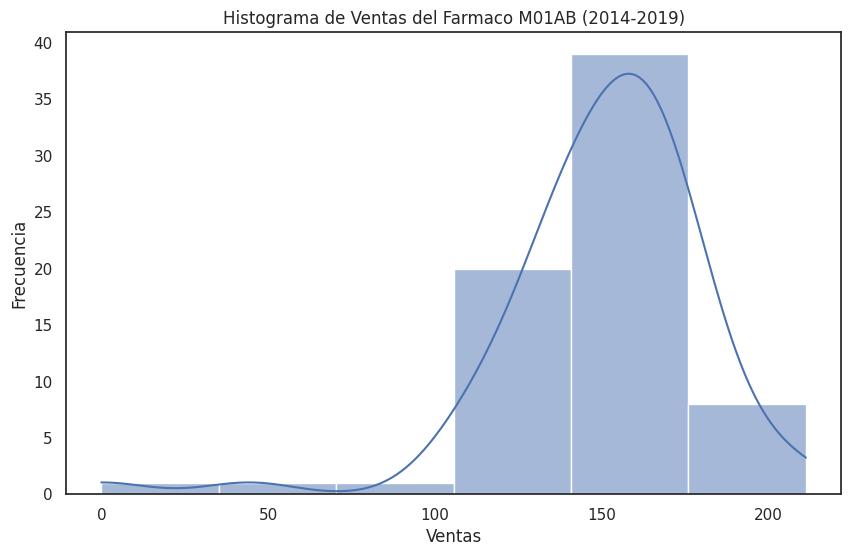

In [317]:
#Elaboración de histogramas utilizando Seaborn
#Configurando el estilo de Seaborn
sns.set(style='white')
#Creando el histograma
plt.figure(figsize=(10,6))
sns.histplot(df['M01AB'],kde=True, bins=6, stat='count')
#Confugirando títulos y etiquetas
plt.title('Histograma de Ventas del Farmaco M01AB (2014-2019)')
plt.ylabel('Frecuencia')
plt.xlabel('Ventas')

#Interpretación del histograma utilizando conceptos de asimetría y curtosis
M01AB= df['M01AB']
print(f'Curtosis: {kurtosis(M01AB)}')
print(f'Asimetria: {skew(M01AB)}')
#Asimetría Negativa, la cola de la distribución se extiende más hacia la izquierda.
#La mayoría de los datos se agrupan hacia el lado derecho.
#El valor de la Kurtosis es >0, por lo que los valores se centran principalmente en el lado izquierdo, con una

Curtosis: 6.598770064408058
Asimetria: -0.20657326942234808


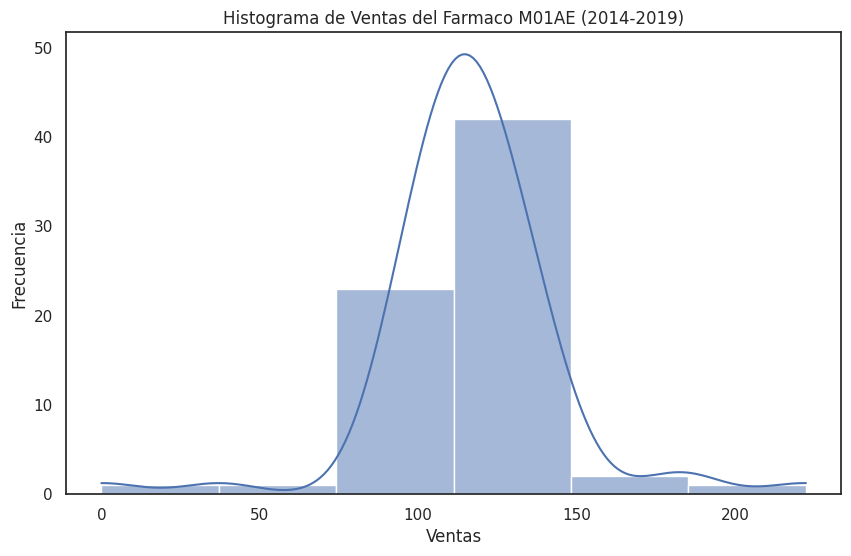

In [318]:
#Elaboración de histogramas utilizando Seaborn
#Configurando el estilo de Seaborn
sns.set(style='white')
#Creando el histograma
plt.figure(figsize=(10,6))
sns.histplot(df['M01AE'],kde=True, bins=6, stat='count')
#Confugirando títulos y etiquetas
plt.title('Histograma de Ventas del Farmaco M01AE (2014-2019)')
plt.ylabel('Frecuencia')
plt.xlabel('Ventas')

#Interpretación del histograma utilizando conceptos de asimetría y curtosis
M01AE= df['M01AE']
print(f'Curtosis: {kurtosis(M01AE)}')
print(f'Asimetria: {skew(M01AE)}')

Curtosis: 2.299215718726642
Asimetria: -0.7062836925521726


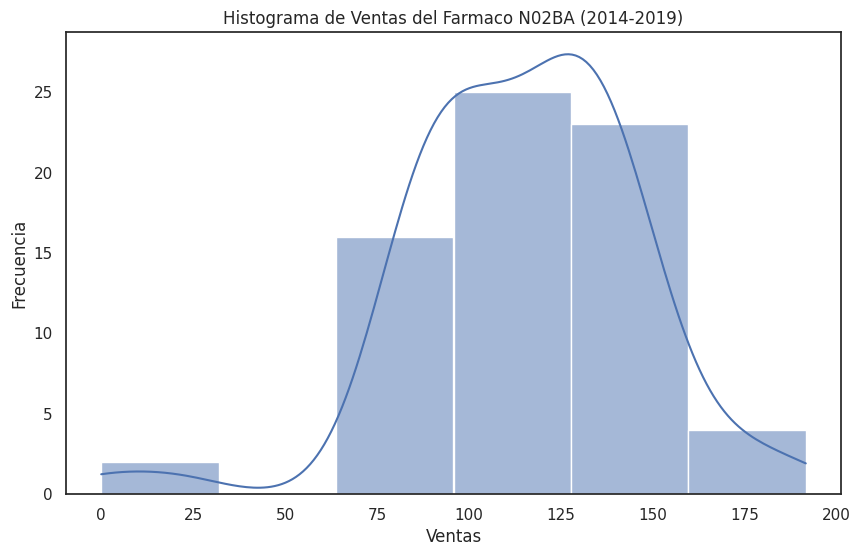

In [319]:
#Elaboración de histogramas utilizando Seaborn
#Configurando el estilo de Seaborn
sns.set(style='white')
#Creando el histograma
plt.figure(figsize=(10,6))
sns.histplot(df['N02BA'],kde=True, bins=6, stat='count')
#Confugirando títulos y etiquetas
plt.title('Histograma de Ventas del Farmaco N02BA (2014-2019)')
plt.ylabel('Frecuencia')
plt.xlabel('Ventas')

#Interpretación del histograma utilizando conceptos de asimetría y curtosis
N02BA= df['N02BA']
print(f'Curtosis: {kurtosis(N02BA)}')
print(f'Asimetria: {skew(N02BA)}')

Curtosis: 0.5785815975859245
Asimetria: 0.5082457570055428


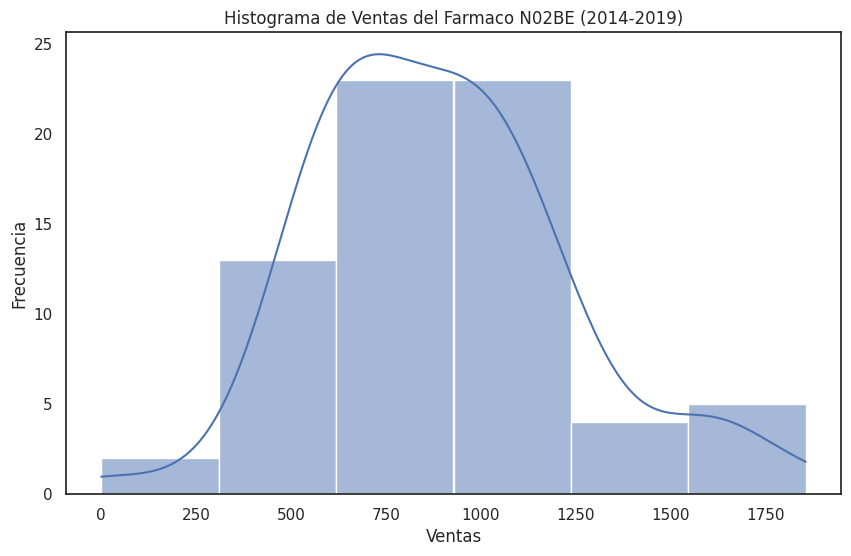

In [320]:
#Elaboración de histogramas utilizando Seaborn
#Configurando el estilo de Seaborn
sns.set(style='white')
#Creando el histograma
plt.figure(figsize=(10,6))
sns.histplot(df['N02BE'],kde=True, bins=6, stat='count')
#Confugirando títulos y etiquetas
plt.title('Histograma de Ventas del Farmaco N02BE (2014-2019)')
plt.ylabel('Frecuencia')
plt.xlabel('Ventas')

#Interpretación del histograma utilizando conceptos de asimetría y curtosis
N02BE= df['N02BE']
print(f'Curtosis: {kurtosis(N02BE)}')
print(f'Asimetria: {skew(N02BE)}')

Curtosis: 1.7741006799915704
Asimetria: 0.4592141850254572


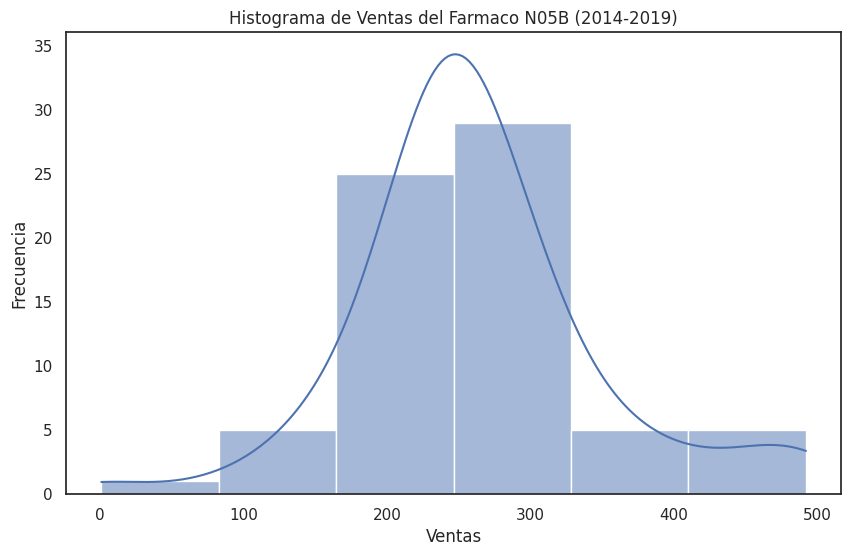

In [321]:
#Elaboración de histogramas utilizando Seaborn
#Configurando el estilo de Seaborn
sns.set(style='white')
#Creando el histograma
plt.figure(figsize=(10,6))
sns.histplot(df['N05B'],kde=True, bins=6, stat='count')
#Confugirando títulos y etiquetas
plt.title('Histograma de Ventas del Farmaco N05B (2014-2019)')
plt.ylabel('Frecuencia')
plt.xlabel('Ventas')

#Interpretación del histograma utilizando conceptos de asimetría y curtosis
N05B= df['N05B']
print(f'Curtosis: {kurtosis(N05B)}')
print(f'Asimetria: {skew(N05B)}')

Curtosis: 2.079300714174104
Asimetria: 0.8914206887008358


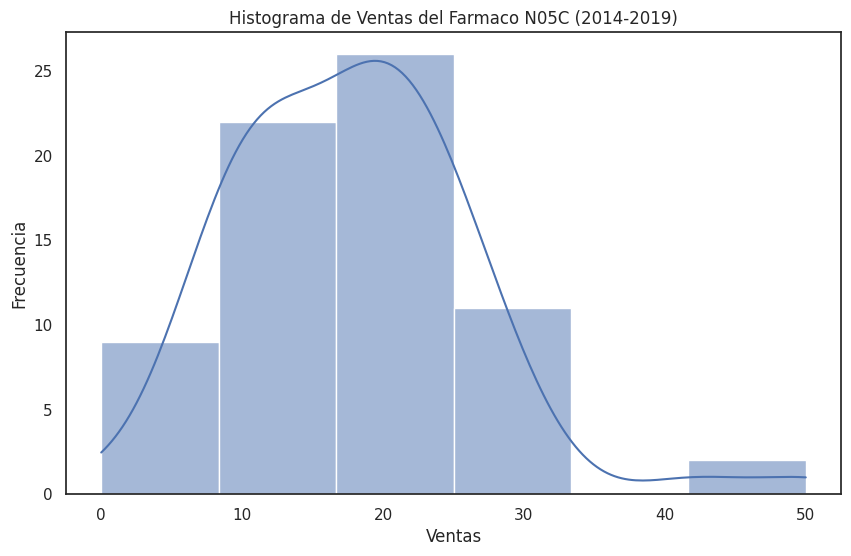

In [322]:
#Elaboración de histogramas utilizando Seaborn
#Configurando el estilo de Seaborn
sns.set(style='white')
#Creando el histograma
plt.figure(figsize=(10,6))
sns.histplot(df['N05C'],kde=True, bins=6, stat='count')
#Confugirando títulos y etiquetas
plt.title('Histograma de Ventas del Farmaco N05C (2014-2019)')
plt.ylabel('Frecuencia')
plt.xlabel('Ventas')

#Interpretación del histograma utilizando conceptos de asimetría y curtosis
N05C= df['N05C']
print(f'Curtosis: {kurtosis(N05C)}')
print(f'Asimetria: {skew(N05C)}')

Curtosis: 0.16263042280526108
Asimetria: 0.5581909015764865


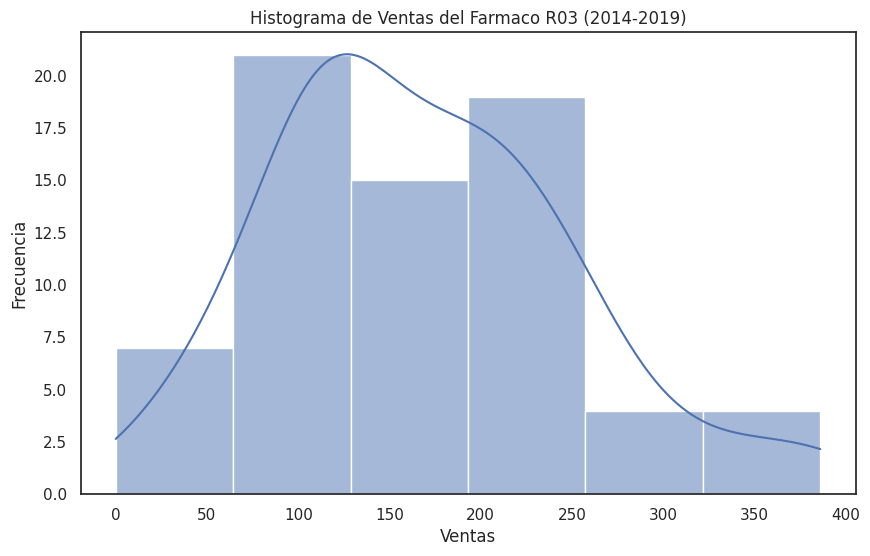

In [323]:
#Elaboración de histogramas utilizando Seaborn
#Configurando el estilo de Seaborn
sns.set(style='white')
#Creando el histograma
plt.figure(figsize=(10,6))
sns.histplot(df['R03'],kde=True, bins=6, stat='count')
#Confugirando títulos y etiquetas
plt.title('Histograma de Ventas del Farmaco R03 (2014-2019)')
plt.ylabel('Frecuencia')
plt.xlabel('Ventas')

#Interpretación del histograma utilizando conceptos de asimetría y curtosis
R03= df['R03']
print(f'Curtosis: {kurtosis(R03)}')
print(f'Asimetria: {skew(R03)}')

Curtosis: -0.14993560220817326
Asimetria: 0.6770008347299641


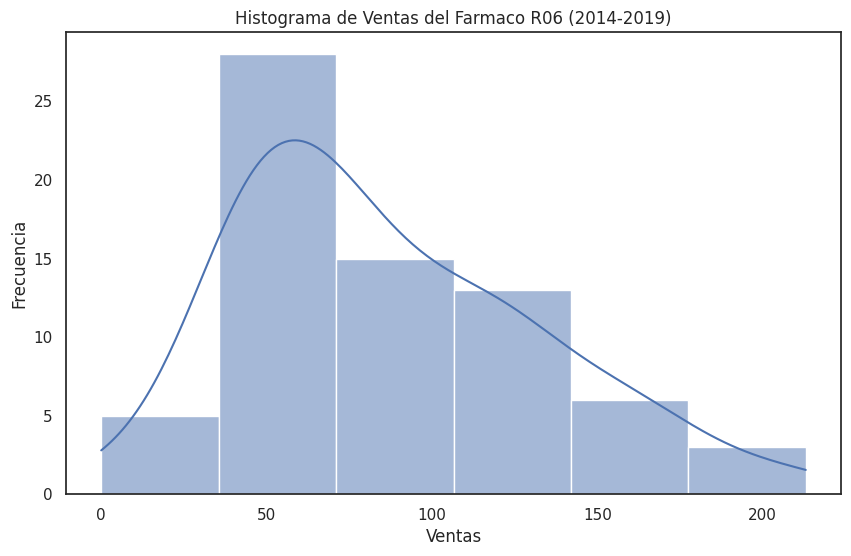

In [324]:
#Elaboración de histogramas utilizando Seaborn
#Configurando el estilo de Seaborn
sns.set(style='white')
#Creando el histograma
plt.figure(figsize=(10,6))
sns.histplot(df['R06'],kde=True, bins=6, stat='count')
#Confugirando títulos y etiquetas
plt.title('Histograma de Ventas del Farmaco R06 (2014-2019)')
plt.ylabel('Frecuencia')
plt.xlabel('Ventas')

#Interpretación del histograma utilizando conceptos de asimetría y curtosis
R06= df['R06']
print(f'Curtosis: {kurtosis(R06)}')
print(f'Asimetria: {skew(R06)}')

## **Exploración de variables categóricas y análisis multivariable (Ana)**

In [325]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import numpy as np
from scipy.stats import trim_mean
from scipy.stats import skew, kurtosis
import pandas as pd

La idea aqui es quitar los guiones de la columna de fechas para poder manejar la informacion de una manera mas sencilla y sin caracteres que nos estorben

In [326]:
print("/content/drive/MyDrive/Proyecto_BEDU/salesmonthly.csv:")
print(df)

/content/drive/MyDrive/Proyecto_BEDU/salesmonthly.csv:
        datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03     R06
0  2014-01-31  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.20
1  2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.20
2  2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.40
3  2014-04-30  113.10   89.475  130.900   698.500  209.0  18.0   97.0   73.70
4  2014-05-31  101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.70
..        ...     ...      ...      ...       ...    ...   ...    ...     ...
65 2019-06-30  151.54  101.627  103.200   610.000  193.0  25.0  142.0  156.04
66 2019-07-31  181.00  103.541   92.800   649.800  250.6  20.0  115.0  105.20
67 2019-08-31  181.91   88.269   84.200   518.100  237.0  26.0  145.0   97.30
68 2019-09-30  161.07  111.437   93.500   984.480  227.8  16.0  161.0  109.10
69 2019-10-31   44.37   37.300   20.650   295.150   86.0   7.0   37.0   11.13

[70 rows

In [327]:
df['datum'] = pd.to_datetime(df['datum'])
df['datum'] = df['datum'].dt.strftime('%Y%m%d')
print("\nDataFrame después de quitar los guiones:")
print(df)


DataFrame después de quitar los guiones:
       datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03     R06
0   20140131  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.20
1   20140228  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.20
2   20140331  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.40
3   20140430  113.10   89.475  130.900   698.500  209.0  18.0   97.0   73.70
4   20140531  101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.70
..       ...     ...      ...      ...       ...    ...   ...    ...     ...
65  20190630  151.54  101.627  103.200   610.000  193.0  25.0  142.0  156.04
66  20190731  181.00  103.541   92.800   649.800  250.6  20.0  115.0  105.20
67  20190831  181.91   88.269   84.200   518.100  237.0  26.0  145.0   97.30
68  20190930  161.07  111.437   93.500   984.480  227.8  16.0  161.0  109.10
69  20191031   44.37   37.300   20.650   295.150   86.0   7.0   37.0   11.13

[70 rows x 9 columns]


Al no tener datos categóricos, convertiremos los datos de fecha (tipo object) y trabajar con datos numericos.

ojito la idea era trabajar con todo numérico puesto que teniamos una columna tipo object, pero está por continuarse la idea.

# **Correlaciones y Regresión Lineal Simple**



###**Coeficiente de correlación de Pearson**

In [328]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('white')

In [329]:
df.head() #Visualizamos las variables

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,20140131,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,20140228,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,20140331,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,20140430,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,20140531,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [330]:
df.corr()

<ipython-input-330-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
M01AB,1.000000,0.597433,0.414754,0.421258,0.191444,0.079730,0.314224,0.307634
M01AE,0.597433,1.000000,0.557838,0.700727,0.398711,0.162850,0.444481,0.028693
N02BA,0.414754,0.557838,1.000000,0.546049,0.492957,0.273581,0.044137,-0.033713
N02BE,0.421258,0.700727,0.546049,1.000000,0.374160,0.211104,0.605476,-0.287455
N05B,0.191444,0.398711,0.492957,0.374160,1.000000,0.580570,0.125204,-0.056787
N05C,0.079730,0.162850,0.273581,0.211104,0.580570,1.000000,0.218196,-0.014792
R03,0.314224,0.444481,0.044137,0.605476,0.125204,0.218196,1.000000,0.000135
R06,0.307634,0.028693,-0.033713,-0.287455,-0.056787,-0.014792,0.000135,1.000000


<ipython-input-331-16a4cfe2aaab>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);


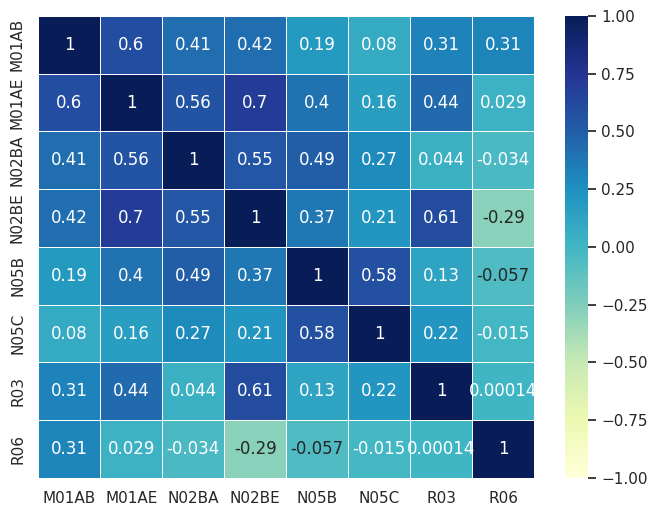

In [331]:
#Hacemos un mapa de calor para poder visualizar la matriz y que sea más fácil de interpretar
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

In [332]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
mask

<ipython-input-332-be371d7477a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))


array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

<ipython-input-333-4ad990a5e612>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)


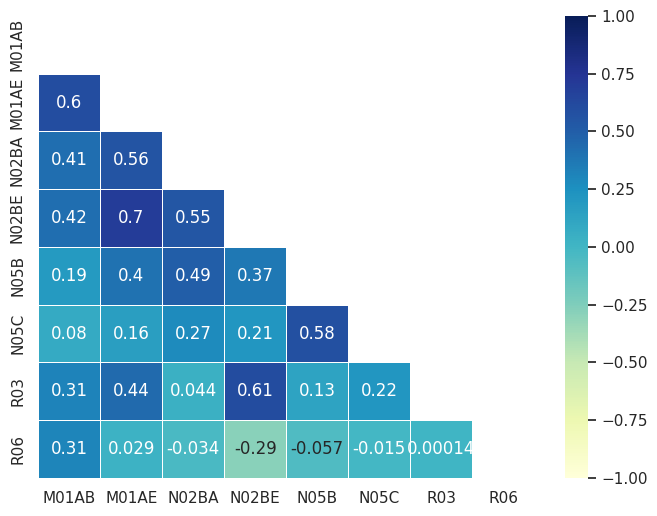

In [333]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)
plt.show()

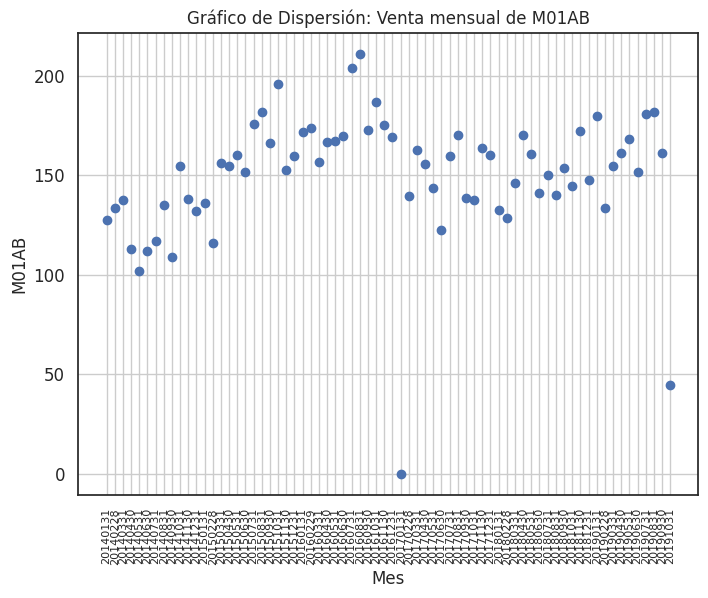

In [334]:
plt.figure(figsize=(8, 6))
plt.scatter(df['datum'], df['M01AB'])
plt.xlabel('Mes')
plt.xticks(rotation=90)
plt.ylabel('M01AB')
plt.xticks(fontsize=8)
plt.yticks(fontsize=12)
plt.title('Gráfico de Dispersión: Venta mensual de M01AB')
plt.grid(True)
plt.show()


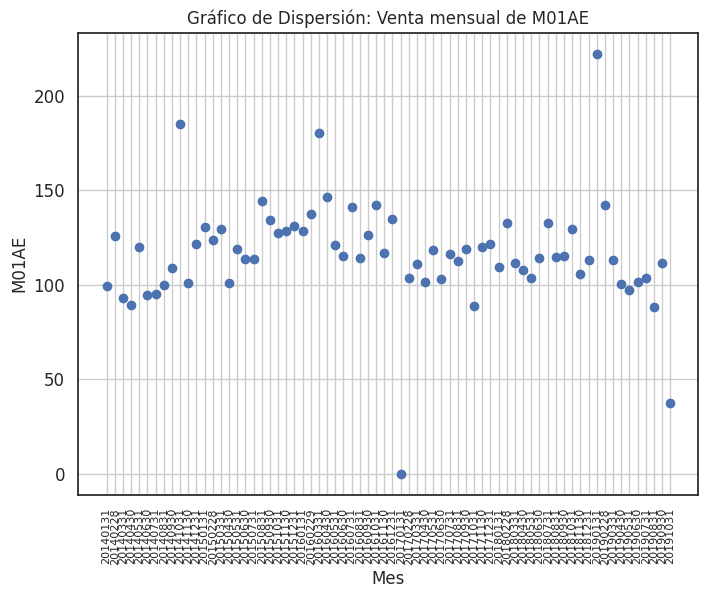

In [335]:
plt.figure(figsize=(8, 6))
plt.scatter(df['datum'], df['M01AE'])
plt.xlabel('Mes')
plt.xticks(rotation=90)
plt.ylabel('M01AE')
plt.xticks(fontsize=8)
plt.yticks(fontsize=12)
plt.title('Gráfico de Dispersión: Venta mensual de M01AE')
plt.grid(True)
plt.show()


###**Regresión lineal**

In [336]:
import pandas as pd
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [337]:
fechas = df['datum']
M01AB = df['M01AB']

In [338]:
lr.fit(fechas.to_frame(), M01AB)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)



LinearRegression()

In [339]:
M01AB_predict = lr.predict(fechas.to_frame())

In [340]:
import seaborn as sns
#print(sns.scatterplot.__doc__)

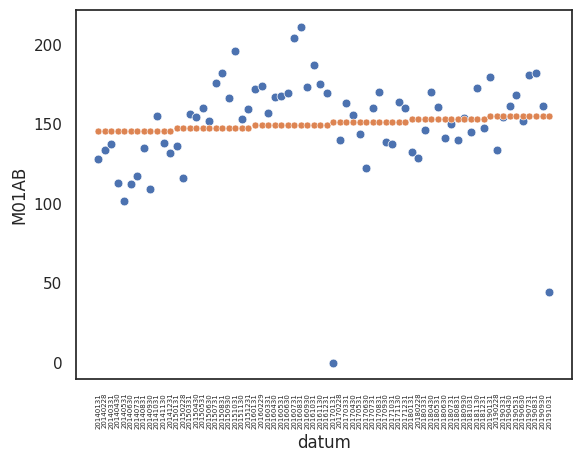

In [341]:
#graficamos

sns.scatterplot(x=fechas, y=M01AB, s=40);
sns.scatterplot(x=fechas, y=M01AB_predict, s=25);
plt.xticks(fontsize=5);
plt.xticks(rotation=90);

#Naranja son los predecidos, los normales son azul.
#La siguiente gráfica muestra las ventas mensuales del medicamento M01AB
#durante el periodo 2014-2019, junto a su respectiva predicción en color naranja.

#NOTA IMPORTANTE
#debido a la gran cantidad de datos, se trabajarán gráficos para cada uno de los años
#dentro del periodo

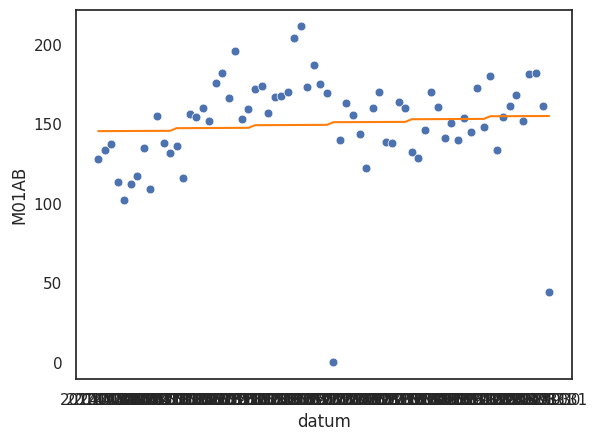

In [342]:
sns.scatterplot(x=fechas, y=M01AB, s=40);
sns.lineplot(x=fechas, y=M01AB_predict, color='#FF7F0E');

In [343]:
intercept = lr.intercept_
coefficient = lr.coef_[0]

In [344]:
print(f'y = {coefficient} * x + {intercept}')

y = 0.00018704759917586756 * x + -3621.8138323755234


In [345]:
print(f'Valor de x: {M01AB[10]}')
print(f'Valor predecido por nuestro modelo: {M01AB_predict[10]}')
print(f'Valor cuantificado directamente usando la funcion: {coefficient * M01AB[10] + intercept}')

Valor de x: 138.08000000000004
Valor predecido por nuestro modelo: 145.53617881351784
Valor cuantificado directamente usando la funcion: -3621.7880048430293


In [346]:
##INTENTOS PREVIOS#####
#modelo = LinearRegression()

In [347]:
#modelo.fit(fechas.values.reshape(-1, 1), M01AB)
#print("Coeficiente (pendiente):", modelo.coef_[0])
#print("Intersección:", modelo.intercept_)

In [348]:
#import matplotlib.pyplot as plt
#plt.scatter(fechas, M01AB, color='blue')
#plt.xlabel('Tiempo')
#plt.ylabel('M01AB')
#plt.title('Relación lineal entre el tiempo y la venta del medicamente M01AB')
#plt.show()


## **Distribuciones Muestrales y técnicas de evaluación de modelos**

## **Visualización de datos avanzada**

## **Pruebas A/B y Procesamiento de Lenguaje Natural**
---

# MODULO 3
## MACHINE LEARNING

## **Introducción a Machine Learning: clasificación no supervisada y supervisada**

INTEGRANTES:

*   Maria Fernanda Barrón Guzmán

* Olga Magali Vazquez Marin

* Ana Cristina Cuevas Garcia

* Katia Berenice Ortegón Rivera



# Definicion de un proyecto con Machine Learning

Para establecer objetivos dentro del proyecto primero definiremos algunos conceptos claves que nos ayudaran a entender mejor el giro que tiene Machine Learning así como la palabra misma.

**¿Qué es Machine Learning?**
Si bien un concepto algo mundano que justamente se menciono en nuestra primera sesión "Darle la capacidad de pensar a un pedazo de metal" pero realmente la definición no esta lejos de esto, sabemos que el Machine Learning es una rama de la Inteligencia Artificial donde se desarrollan algoritmos y sistemas que puedan aprender de manera autonomatica sin necesidad de que el humano intervenga y para esto se require de "aprendizaje".Sabemos que aprender es un concepto bastante amplio, campo de estudio psicologico donde existen infinidad de teorias respecto al tema pero una cosa es segura, aprender conlleva la adquisición de conocimientos en donde regularmente se cometen errores y por ello es necesario poner en práctica nuestros conocimientos hasta lograr alcanzar un menor margen de error, esto lo sabemos a base de evaluaciones que se nos aplican a lo largo del tiempo. El aprendizaje en el Machine Learning se realiza a base de técnicas establecidas pero al final se sigue el mismo principio, descenso en gradiante y comparativas son algunos métodos de aprendizaje.

**Algoritmos de aprendizaje**

Existen demasiados algoritmos de aprendizaje en el mundo del Machine Learning pero aquí haremos mención solo de cuatro con los cuales estuvimos trabajando a lo largo del curso

*   Algoritmos supervisados de ML

Este tipo de algoritmos analizan datasets históricos con datos de input y output etiquetados, es decir tenemos entradas que le corresponden a una salida.

Con esta input data se desarrollan funiones para asignar etiquetas a la output data. El entrenamiento se realiza con datos históricos para que se puedan predecir los datos de salida.

*   Algoritmos no supervisados de ML

Este tipo de algoritmos no tienen un data histórico por lo que la data no se encuentra etiquetada por lo que estos algoritmos buscan explorar los datos para sacar inferencias que describan estructuras que no sean tan claras.

*   Algoritmos semi-supervisados de ML

En este tipo de algoritmos si contienen data de entrenamiento donde una parte se encuentra etiquetada, generalmente en menor cantidad mientras que la restante no lo esta. Estos algoritmos se usan para cuando la data etiquetada necesita de medios para aprender.

*   Algoritmos de aprendizaje por refuerzo

En este tipo de algoritmo se basa en procesos de control y monitoreo en el que obtenemos una retroalimentación al interactuar un ambiente permitiendo que el algoritmo determine el comportamiento ideal para mejorar su desempeño basándose en la información de entrada.




# Modelo predictivo de venta de Fármacos por año

# Uso de algoritmos de Machine Learning para separar, validar y evaluar

In [349]:
#Libreria
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import cv2

In [350]:
#leemos el csv
df = pd.read_csv('/content/drive/MyDrive/Proyecto_BEDU/salesmonthly.csv')
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [351]:
#quitamos guiones a datum
df['datum'] = pd.to_datetime(df['datum'])
df['datum'] = df['datum'].dt.strftime('%Y%m%d')
print("\nDataFrame después de quitar los guiones:")
print(df)


DataFrame después de quitar los guiones:
       datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03     R06
0   20140131  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.20
1   20140228  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.20
2   20140331  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.40
3   20140430  113.10   89.475  130.900   698.500  209.0  18.0   97.0   73.70
4   20140531  101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.70
..       ...     ...      ...      ...       ...    ...   ...    ...     ...
65  20190630  151.54  101.627  103.200   610.000  193.0  25.0  142.0  156.04
66  20190731  181.00  103.541   92.800   649.800  250.6  20.0  115.0  105.20
67  20190831  181.91   88.269   84.200   518.100  237.0  26.0  145.0   97.30
68  20190930  161.07  111.437   93.500   984.480  227.8  16.0  161.0  109.10
69  20191031   44.37   37.300   20.650   295.150   86.0   7.0   37.0   11.13

[70 rows x 9 columns]


In [352]:
#nueva columna con solo los años y meses
df['year'] = df['datum'].str.slice(0, 6)
df['total_sales'] = df.drop('year', axis=1).sum(axis=1)


print(df)

       datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03     R06  \
0   20140131  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.20   
1   20140228  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.20   
2   20140331  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.40   
3   20140430  113.10   89.475  130.900   698.500  209.0  18.0   97.0   73.70   
4   20140531  101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.70   
..       ...     ...      ...      ...       ...    ...   ...    ...     ...   
65  20190630  151.54  101.627  103.200   610.000  193.0  25.0  142.0  156.04   
66  20190731  181.00  103.541   92.800   649.800  250.6  20.0  115.0  105.20   
67  20190831  181.91   88.269   84.200   518.100  237.0  26.0  145.0   97.30   
68  20190930  161.07  111.437   93.500   984.480  227.8  16.0  161.0  109.10   
69  20191031   44.37   37.300   20.650   295.150   86.0   7.0   37.0   11.13   

      year  total_sales  
0   201401   

<ipython-input-352-39e49836cf0e>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['total_sales'] = df.drop('year', axis=1).sum(axis=1)


In [353]:
#verificamos los types de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datum        70 non-null     object 
 1   M01AB        70 non-null     float64
 2   M01AE        70 non-null     float64
 3   N02BA        70 non-null     float64
 4   N02BE        70 non-null     float64
 5   N05B         70 non-null     float64
 6   N05C         70 non-null     float64
 7   R03          70 non-null     float64
 8   R06          70 non-null     float64
 9   year         70 non-null     object 
 10  total_sales  70 non-null     float64
dtypes: float64(9), object(2)
memory usage: 6.1+ KB


In [354]:
#transformamos la columna year a tipo int por que al convertirla en primera instancia, lo devolvia tipo object dado que fue creada a partir de la columna datum que era tipo object
df['year'] = df['year'].astype(int)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datum        70 non-null     object 
 1   M01AB        70 non-null     float64
 2   M01AE        70 non-null     float64
 3   N02BA        70 non-null     float64
 4   N02BE        70 non-null     float64
 5   N05B         70 non-null     float64
 6   N05C         70 non-null     float64
 7   R03          70 non-null     float64
 8   R06          70 non-null     float64
 9   year         70 non-null     int64  
 10  total_sales  70 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 6.1+ KB
None


In [355]:
#creamos df2 donde segmentamos las fechas y seleccionamos de 201401 a 201812

df2 = df[(df['year'] >= 201401) & (df['year'] <= 201812)]
df2.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,total_sales
0,20140131,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2,201401,1821.110
1,20140228,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,201402,1974.470
2,20140331,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,201403,1606.720
3,20140430,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,201404,1429.675
4,20140531,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,201405,1506.303


In [356]:
#Verificamos que la division del dataset fuese hasta el año 2018
max_year = df2['year'].max()
min_year = df2['year'].min()
print("Maximum year:", max_year)
print("Minimum year:", min_year)


Maximum year: 201812
Minimum year: 201401


In [357]:
#quitamos la columna datum por que solo trabajaremos con la columna years
df2 = df2.drop('datum', axis=1)


In [358]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   M01AB        60 non-null     float64
 1   M01AE        60 non-null     float64
 2   N02BA        60 non-null     float64
 3   N02BE        60 non-null     float64
 4   N05B         60 non-null     float64
 5   N05C         60 non-null     float64
 6   R03          60 non-null     float64
 7   R06          60 non-null     float64
 8   year         60 non-null     int64  
 9   total_sales  60 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 7.2 KB


In [359]:
#agregamos una columna nueva que sea el resultado de la suma de cada fila sin la columna year
df2['total_sales'] = df2.drop('year', axis=1).sum(axis=1)

df2.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,total_sales
0,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2,201401,3642.220
1,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,201402,3948.940
2,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,201403,3213.440
3,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,201404,2859.350
4,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,201405,3012.606


In [360]:
#dividimos el df2 de manera aleatoria en: train 80%, validation 5% y test 15%, donde el objetivo será total_sales y caracteristicas son las columnas menos year y total_sales

#Dividimos el dataset en train y test
train_val, test = train_test_split(df2, test_size=0.15, random_state=42)

#Dividimos el dataset de train en train y validation
train, val = train_test_split(train_val, test_size=0.05, random_state=42)

#Imprimimos el tamaño de cada dataset
print("Train size:", train.shape)
print("Validation size:", val.shape)
print("Test size:", test.shape)

#Definimos las características y el objetivo
features = train.drop(['year', 'total_sales'], axis=1)
target = train['total_sales']

#Imprimimos las características y el objetivo
print("Features:", features.head())
print("Target:", target.head())


Train size: (48, 10)
Validation size: (3, 10)
Test size: (9, 10)
Features:      M01AB    M01AE   N02BA     N02BE   N05B  N05C    R03    R06
19  181.69  144.519  133.40   790.788  265.5  15.0   45.0   83.7
55  140.00  114.719   88.25   733.838  253.0  20.0  159.0  103.1
44  138.33  118.711   88.15   863.750  223.0  23.0  139.0   66.9
15  154.50  101.115  122.10   940.170  192.0   5.0   97.0  112.0
1   133.32  126.050  177.00  1001.900  347.0  31.0  122.0   36.2
Target: 19    3319.194
55    3223.814
44    3321.682
15    3447.770
1     3948.940
Name: total_sales, dtype: float64


In [361]:
#cantidad de filas de df, df2, target y features

print(f"df has {df.shape[0]} rows")
print(f"df2 has {df2.shape[0]} rows")
print(f"df2 has {target.shape[0]} rows")
print(f"df2 has {features.shape[0]} rows")

df has 70 rows
df2 has 60 rows
df2 has 48 rows
df2 has 48 rows


# Algoritmos no supervisados (K-means) y Algoritmos supervisados (Regresion Lineal y Arboles de decision)


In [362]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [363]:
#creamos df3 que será la destinada unicamente a predicción
df3 = df[(df['year'] >= 201901) & (df['year'] <= 201912)]

#le quitamos datum
df3['total_sales'] = df3.drop('year', axis=1).sum(axis=1)

#creamos un total sales
valor_real = df3['total_sales']
df3 = df3.drop('datum', axis=1)
df3.head()

<ipython-input-363-9be425faba99>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3['total_sales'] = df3.drop('year', axis=1).sum(axis=1)
<ipython-input-363-9be425faba99>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sales'] = df3.drop('year', axis=1).sum(axis=1)


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,total_sales
60,179.70,222.351,99.70,1660.612,295.2,23.0,386.0,41.3,201901,5815.726
61,133.73,142.155,110.20,1001.212,249.4,12.0,226.0,69.5,201902,3888.394
62,154.52,113.118,83.35,941.050,301.4,19.0,257.0,169.5,201903,4077.876
63,161.39,100.165,88.10,647.650,299.4,22.0,259.0,179.1,201904,3513.610
64,168.04,97.258,104.10,703.562,265.8,26.0,322.0,135.4,201905,3644.320


In [364]:
#Definimos las variables independientes (medicamentos) y la variable dependiente (df2)
X = df2[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y = df2['total_sales']

#Inicializamos y ajustamos el modelo de regresión lineal
model = LinearRegression().fit(X, y)

print('Intercepto:', model.intercept_)
print('Coeficientes:', model.coef_)

#Separamos las características (X) del nuevo DataFrame
X_new = df3[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]

#Hacemos predicciones utilizando el modelo entrenado
predictions_new = model.predict(X_new)

#Crear un DataFrame con los datos reales y las predicciones
comparacion = pd.DataFrame({
    'Total_ventas_real': df3['total_sales'],  # Suponiendo que esta es la columna de ventas reales
    'Total_ventas_predicho': predictions_new
})

print(comparacion)

#y calculamos el Error Cuadrático Medio (MSE)
mse = mean_squared_error(comparacion['Total_ventas_real'], comparacion['Total_ventas_predicho'])
print("Error Cuadrático Medio (MSE):", mse)


Intercepto: -1.2278178473934531e-11
Coeficientes: [2. 2. 2. 2. 2. 2. 2. 2.]
    Total_ventas_real  Total_ventas_predicho
60           5815.726               5815.726
61           3888.394               3888.394
62           4077.876               4077.876
63           3513.610               3513.610
64           3644.320               3644.320
65           2964.814               2964.814
66           3035.882               3035.882
67           2755.558               2755.558
68           3728.774               3728.774
69           1077.200               1077.200
Error Cuadrático Medio (MSE): 2.6929898817429506e-23


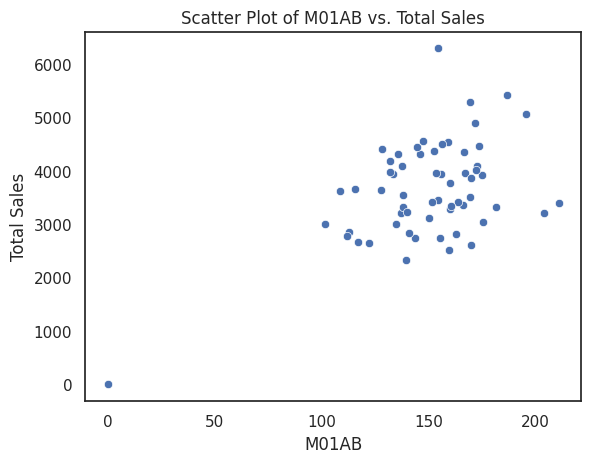

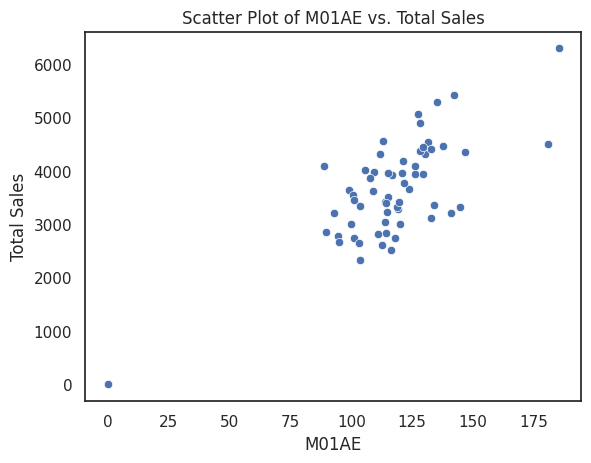

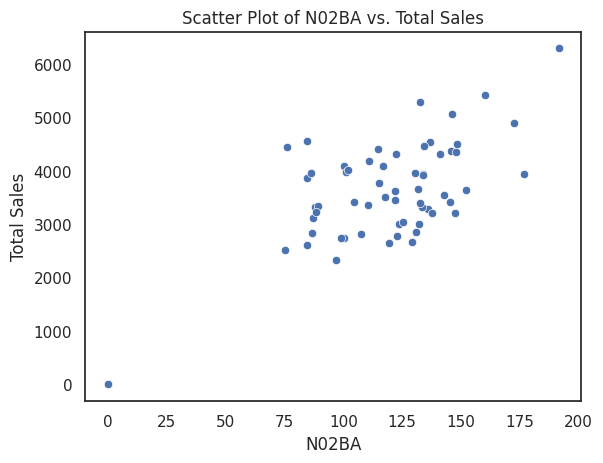

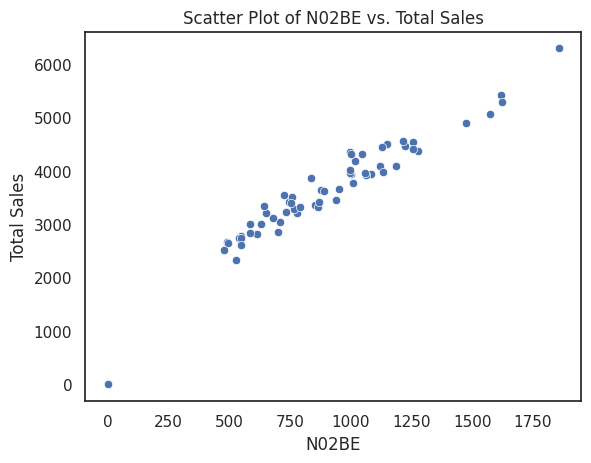

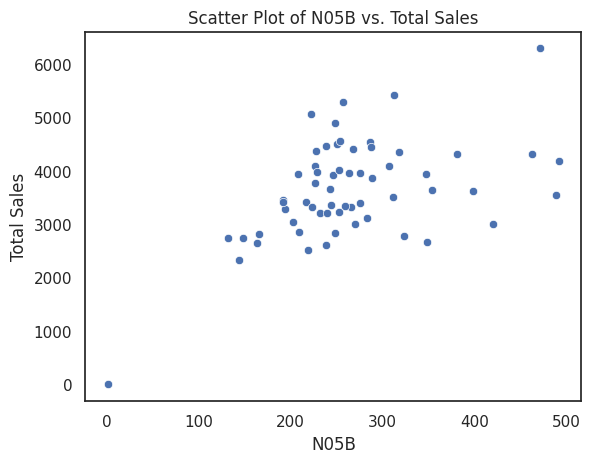

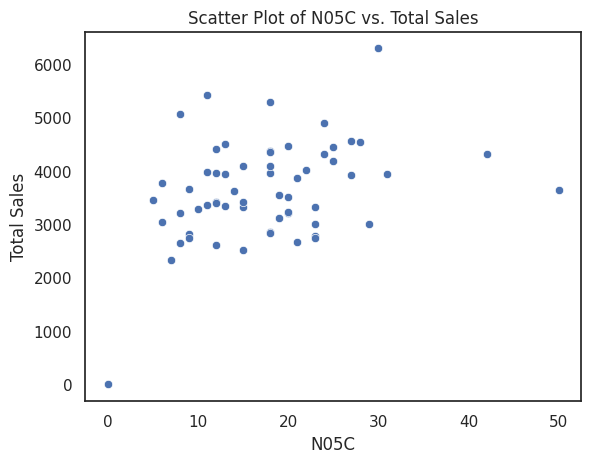

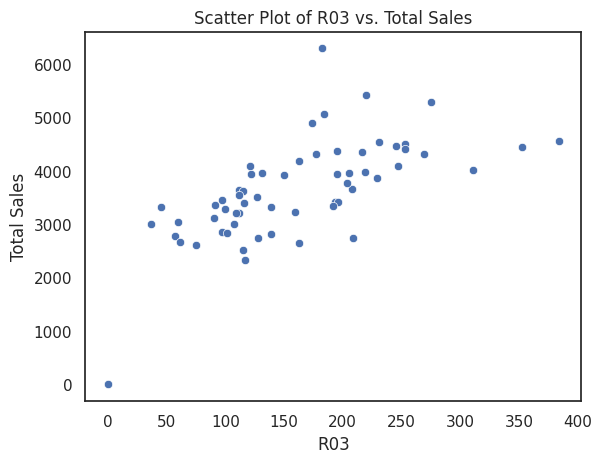

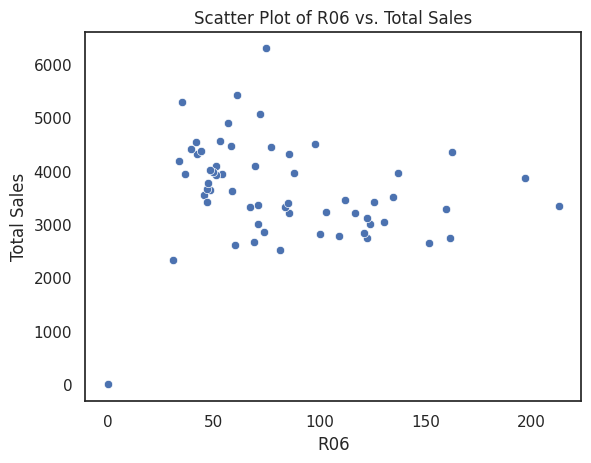

In [365]:
#gráficos de dispersión para cada variable independiente vs la variable dependiente

for column in X.columns:
    sns.scatterplot(x=X[column], y=y)
    plt.xlabel(column)
    plt.ylabel('Total Sales')
    plt.title(f'Scatter Plot of {column} vs. Total Sales')
    plt.show()


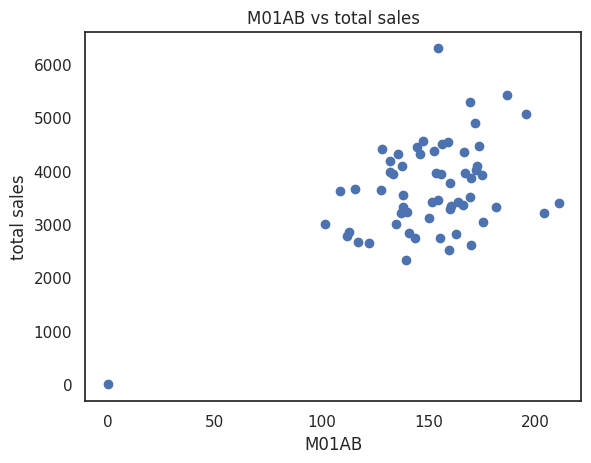

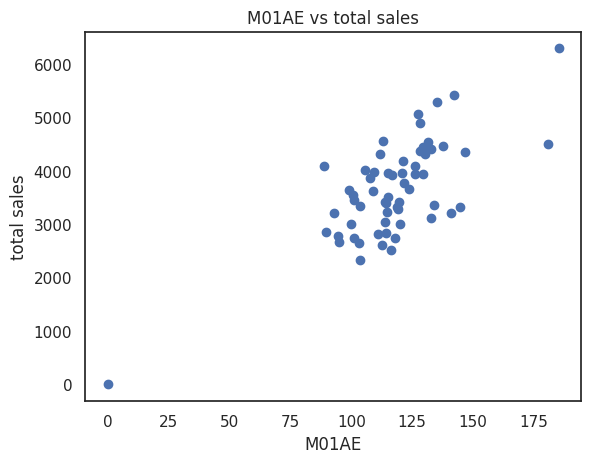

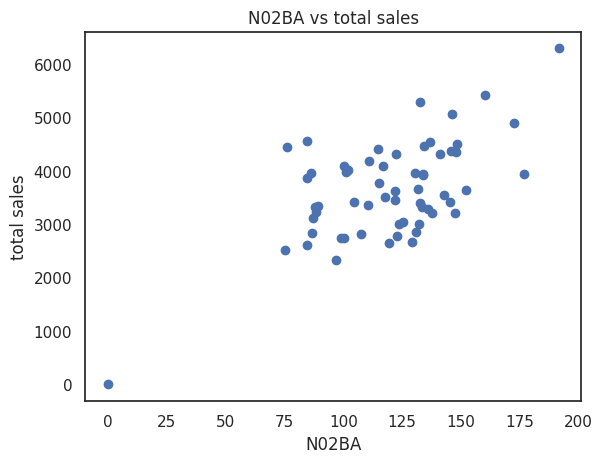

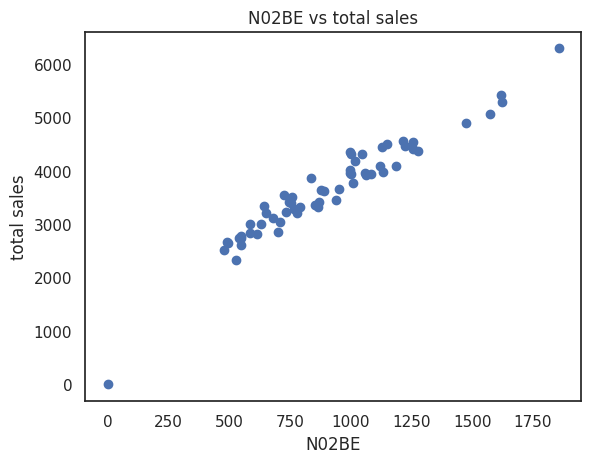

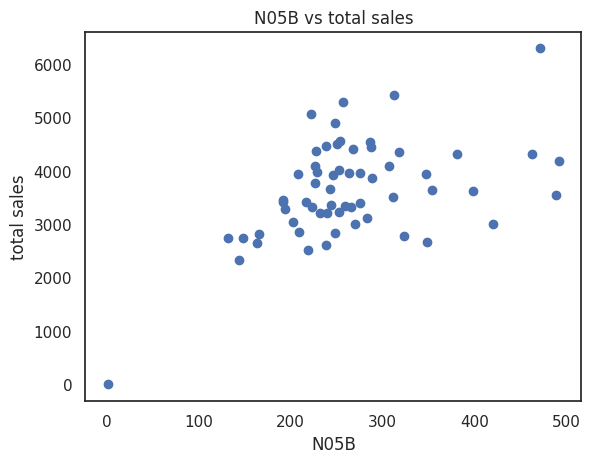

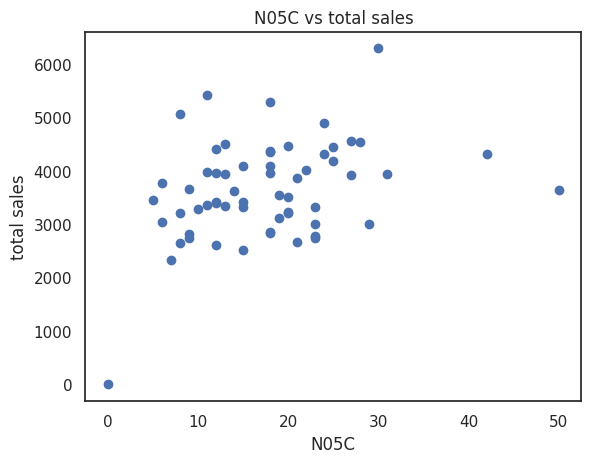

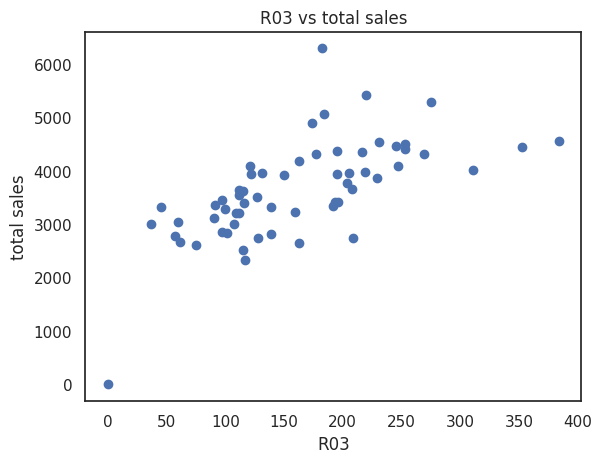

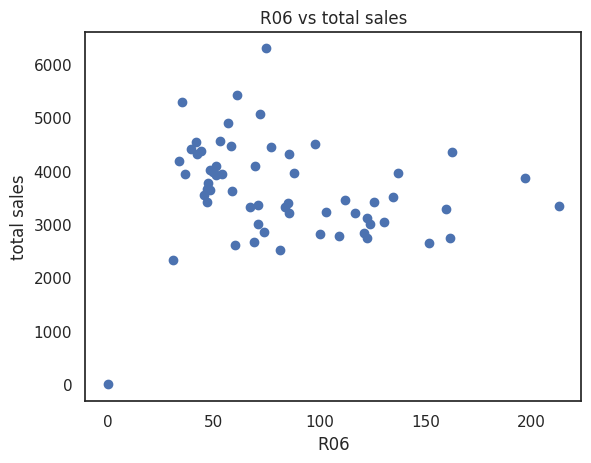

In [366]:
#Extraemos las columnas reelevantes del df2
X = df2[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y = df2['total_sales']

# creamos el nuevo dataframe con base en df2
df3 = df2[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06', 'total_sales']]

#asignamos los nombre de las columnas a X
X.columns = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

for column in X.columns:
    plt.scatter(df2[column], df2['total_sales'])
    plt.xlabel(column)
    plt.ylabel('total sales')
    plt.title(f'{column} vs total sales')
    plt.show()

    Total_ventas_real  Total_ventas_predicho
0            3642.220               3642.220
1            3948.940               3948.940
2            3213.440               3213.440
3            2859.350               2859.350
4            3012.606               3012.606
5            2780.410               2780.410
6            2664.740               2664.740
7            2998.040               2998.040
8            3629.188               3629.188
9            6293.812               6293.812
10           3541.280               3541.280
11           4186.970               4186.970
12           4315.498               4315.498
13           3663.064               3663.064
14           3948.152               3948.152
15           3447.770               3447.770
16           3289.154               3289.154
17           3411.216               3411.216
18           3046.096               3046.096
19           3319.194               3319.194
20           3358.734               3358.734
21        

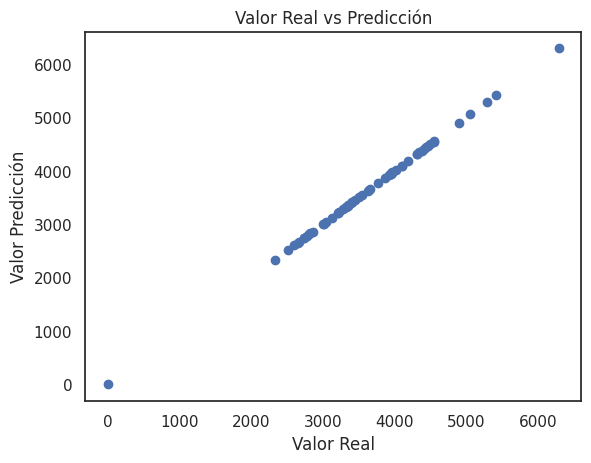

In [367]:
#valor real vs prediccion

#Separamos las características (X) del nuevo DataFrame
X_new = df3[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]

#Hacemos predicciones utilizando el modelo entrenado
predictions_new = model.predict(X_new)

#Creamos un DataFrame con los datos reales y las predicciones
comparacion = pd.DataFrame({
    'Total_ventas_real': df3['total_sales'],  # Suponiendo que esta es la columna de ventas reales
    'Total_ventas_predicho': predictions_new
})

#comparamos
print(comparacion)

#Grafica
plt.scatter(comparacion['Total_ventas_real'], comparacion['Total_ventas_predicho'])
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicción')
plt.title('Valor Real vs Predicción')
plt.show()


In [368]:
#si notamos los valores de prediccion y reales son muy similares pero al observar el MSE
#notamos que si hay un error pequeñito por lo que en realidad si hay una diferencia entre uno y otro
#año 2019 de nuestro dataset (df) y el año 2019 predicho (df3)

# Red Neuronal

En este apartado se realizo una red neuronal en base al modelo StandardScaler con la finalidad de estandarizar las características de nuestro conjunto de datos.

In [369]:
# Definir las características (X) y la variable objetivo (y) para el conjunto de entrenamiento
X_train = df2[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y_train = df2['total_sales']

# Definir las características (X) y la variable objetivo (y) para el conjunto de prueba
X_test = df3[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
y_test = df3['total_sales']

# Escalar los datos (opcional pero recomendado para redes neuronales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo de red neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta con activación ReLU
    Dense(64, activation='relu'),  # Otra capa oculta con activación ReLU
    Dense(1)  # Capa de salida lineal
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')  # Optimizador y función de pérdida para regresión

# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)  # Usar parte del conjunto de entrenamiento como conjunto de validación



Epoch 1/10
2/2 [==============================] - 1s 217ms/step - loss: 13894940.0000 - val_loss: 15040392.0000
Epoch 2/10
2/2 [==============================] - 0s 73ms/step - loss: 13893764.0000 - val_loss: 15039371.0000
Epoch 3/10
2/2 [==============================] - 0s 41ms/step - loss: 13892587.0000 - val_loss: 15038371.0000
Epoch 4/10
2/2 [==============================] - 0s 44ms/step - loss: 13891367.0000 - val_loss: 15037363.0000
Epoch 5/10
2/2 [==============================] - 0s 46ms/step - loss: 13890207.0000 - val_loss: 15036331.0000
Epoch 6/10
2/2 [==============================] - 0s 40ms/step - loss: 13888929.0000 - val_loss: 15035291.0000
Epoch 7/10
2/2 [==============================] - 0s 38ms/step - loss: 13887635.0000 - val_loss: 15034220.0000
Epoch 8/10
2/2 [==============================] - 0s 37ms/step - loss: 13886313.0000 - val_loss: 15033101.0000
Epoch 9/10
2/2 [==============================] - 0s 56ms/step - loss: 13884877.0000 - val_loss: 15031928.0000


In [370]:
# Evaluar el modelo en el conjunto de prueba
mse = model.evaluate(X_test_scaled, y_test)
print("Error cuadrático medio en conjunto de prueba:", mse)

# Hacer predicciones
predictions = model.predict(X_test_scaled)


2/2 [==============================] - 0s 8ms/step - loss: 14111905.0000
Error cuadrático medio en conjunto de prueba: 14111905.0
2/2 [==============================] - 0s 6ms/step


## MLPRegressor: Modelo extra ya que no se pudo usar MLPClassifier para redes neuronales

Para la red neuronal no podemos hacer una clasificación ya que no contamos con variables categoricas para apoder generar las etiquetas, sin embargo podemos hacer una regresión con nuestras variables númericas, esto lo haremos con ayuda de MLPRegressor y make_regression dandonos como resultado la predicción de los total_sales para el año 2019 respecto al dataset histórico de 2014-2018.

In [371]:
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [372]:
#Hacemos una visualización de los datos del Dataset
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,total_sales
0,20140131,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2,201401,1821.110
1,20140228,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,201402,1974.470
2,20140331,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,201403,1606.720
3,20140430,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,201404,1429.675
4,20140531,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,201405,1506.303


In [373]:
#Ajuatamos datum a tipo de dato "datetime"
df['datum'] = pd.to_datetime(df['datum'])
#Obtenemos la caracteristica "year"
df['year'] = df['datum'].dt.year
#Agregamos la columna "total_sales" dentro del dataset
df['total_sales'] = df.drop('year', axis=1).sum(axis=1)
#Ponemos como indice del dataset la columna "year" y creamos a partir del indice la columna "year_num" que solo ocupamos para la tabla de correlaciones
df.set_index('year', inplace=True)
df['year_num'] = df.index.astype(int)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 2014 to 2019
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datum        70 non-null     datetime64[ns]
 1   M01AB        70 non-null     float64       
 2   M01AE        70 non-null     float64       
 3   N02BA        70 non-null     float64       
 4   N02BE        70 non-null     float64       
 5   N05B         70 non-null     float64       
 6   N05C         70 non-null     float64       
 7   R03          70 non-null     float64       
 8   R06          70 non-null     float64       
 9   total_sales  70 non-null     float64       
 10  year_num     70 non-null     int64         
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 6.6 KB


<ipython-input-373-4a49e36f754c>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['total_sales'] = df.drop('year', axis=1).sum(axis=1)


,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,total_sales,year_num
year,,,,,,,,,,,
2014,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2,3642.220,2014
2014,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,3948.940,2014
2014,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,3213.440,2014
2014,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,2859.350,2014
2014,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,3012.606,2014


In [374]:
#Eliminamos la columna "datum"
df = df.drop(columns=['datum'])
df.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,total_sales,year_num
year,,,,,,,,,,
2014,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2,3642.220,2014
2014,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,3948.940,2014
2014,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,3213.440,2014
2014,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,2859.350,2014
2014,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,3012.606,2014


In [375]:
#Obtenemos la tabla de correlación
df.corr()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,total_sales,year_num
M01AB,1.000000,0.597433,0.414754,0.421258,0.191444,0.079730,0.314224,0.307634,0.542636,0.096003
M01AE,0.597433,1.000000,0.557838,0.700727,0.398711,0.162850,0.444481,0.028693,0.779824,-0.096459
N02BA,0.414754,0.557838,1.000000,0.546049,0.492957,0.273581,0.044137,-0.033713,0.606336,-0.671651
N02BE,0.421258,0.700727,0.546049,1.000000,0.374160,0.211104,0.605476,-0.287455,0.955002,-0.119576
N05B,0.191444,0.398711,0.492957,0.374160,1.000000,0.580570,0.125204,-0.056787,0.535017,-0.374100
N05C,0.079730,0.162850,0.273581,0.211104,0.580570,1.000000,0.218196,-0.014792,0.337646,-0.087230
R03,0.314224,0.444481,0.044137,0.605476,0.125204,0.218196,1.000000,0.000135,0.672764,0.424832
R06,0.307634,0.028693,-0.033713,-0.287455,-0.056787,-0.014792,0.000135,1.000000,-0.097977,0.242008
total_sales,0.542636,0.779824,0.606336,0.955002,0.535017,0.337646,0.672764,-0.097977,1.000000,-0.099729
year_num,0.096003,-0.096459,-0.671651,-0.119576,-0.374100,-0.087230,0.424832,0.242008,-0.099729,1.000000


In [376]:
#Dataset que va desde 2014 a 2018
df_segmentado = df[(df['year_num'] >= 2014) & (df['year_num'] <= 2018)]
df_segmentado.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,total_sales,year_num
year,,,,,,,,,,
2014,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2,3642.220,2014
2014,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,3948.940,2014
2014,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,3213.440,2014
2014,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,2859.350,2014
2014,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,3012.606,2014


In [377]:
#Nos aseguramos que el dataset sea de 2014 a 2018
max_year = df_segmentado['year_num'].max()
min_year = df_segmentado['year_num'].min()
print("Maximum year:", max_year)
print("Minimum year:", min_year)

Maximum year: 2018
Minimum year: 2014


In [378]:
#Dataset de 2019
df_3 = df[df['year_num'] == 2019]
df_3_prueba = df_3.drop(columns=['total_sales'])
df_3_prueba.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year_num
year,,,,,,,,,
2019,179.70,222.351,99.70,1660.612,295.2,23.0,386.0,41.3,2019
2019,133.73,142.155,110.20,1001.212,249.4,12.0,226.0,69.5,2019
2019,154.52,113.118,83.35,941.050,301.4,19.0,257.0,169.5,2019
2019,161.39,100.165,88.10,647.650,299.4,22.0,259.0,179.1,2019
2019,168.04,97.258,104.10,703.562,265.8,26.0,322.0,135.4,2019


In [379]:
#Eliminamos la columna 'year_num' ya que el modelo no requiere la columna para la predicción
df_3_prueba = df_3_prueba.drop(columns=['year_num'])
df_3_prueba.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
year,,,,,,,,
2019,179.70,222.351,99.70,1660.612,295.2,23.0,386.0,41.3
2019,133.73,142.155,110.20,1001.212,249.4,12.0,226.0,69.5
2019,154.52,113.118,83.35,941.050,301.4,19.0,257.0,169.5
2019,161.39,100.165,88.10,647.650,299.4,22.0,259.0,179.1
2019,168.04,97.258,104.10,703.562,265.8,26.0,322.0,135.4


In [380]:
#Asignamos los datos correspondientes a las variables independientes y la variable dependiente
X = df_segmentado[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
Y = df_segmentado['total_sales']

In [381]:
#Separación de los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state=42)
#Creación del modelo
modelo = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1100, random_state = 42)

In [382]:
#Entrenamiento del modelo con el dataset de 2014-2018
modelo.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10,), max_iter=1100, random_state=42)

In [383]:
#Hacer predicciones sobre datos de prueba con el dataset de 2014-2018
Y_pred = modelo.predict(X_test)

In [384]:
#Creamos un dataset a partir de los valores reales y los valores de predicción
df_pred = pd.DataFrame({'valor_real':Y_test, 'prediccion':Y_pred})
df_pred.head(30)

,valor_real,prediccion
year,,
2014,3642.220,3644.107338
2014,2780.410,2711.585709
2017,2.000,2.348722
2017,4100.254,4195.928200
2015,3663.064,3636.636169
2018,3126.958,3052.719291
2016,5420.282,5603.052498
2018,3971.402,4044.048410
2015,4315.498,4276.438475


In [385]:
#Calculamos el coeficiente de determinación para ver la varianza en la variable dependiente respecto a las independientes
r_cuadrado = r2_score(Y_test, Y_pred)
print(r_cuadrado)

0.9910511953086087


In [386]:
#Predecimos los "total_sales" con el modelo para el Dataset de 2019
modelo.predict(df_3_prueba)

array([5842.10893913, 3851.86151168, 4030.22916413, 3331.86232333,
       3429.58800712, 2875.54107564, 2934.45579764, 2589.39142539,
       3768.39457994, 1090.8285559 ])

In [387]:
#Visualizamos los "total_sales" reales del Dataset de 2019
df_3.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,total_sales,year_num
year,,,,,,,,,,
2019,179.70,222.351,99.70,1660.612,295.2,23.0,386.0,41.3,5815.726,2019
2019,133.73,142.155,110.20,1001.212,249.4,12.0,226.0,69.5,3888.394,2019
2019,154.52,113.118,83.35,941.050,301.4,19.0,257.0,169.5,4077.876,2019
2019,161.39,100.165,88.10,647.650,299.4,22.0,259.0,179.1,3513.610,2019
2019,168.04,97.258,104.10,703.562,265.8,26.0,322.0,135.4,3644.320,2019


## Máquina de soporte vectorial ####

In [388]:

# Definimos features (X) y target (y) para entrenamiento
X_train = df2[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']][(df2['year'] >= 201401) & (df2['year'] <= 201812)]
y_train = df2['total_sales'][(df2['year'] >= 201401) & (df2['year'] <= 201812)]

# Definimos features (X) y target (y) para prueba
X_test = df3[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']][(df3['year'] >= 201901) & (df3['year'] <= 201912)]
y_test = df3['total_sales'][(df3['year'] >= 201901) & (df3['year'] <= 201912)]

#Buscamos valores no numericos en las variables target
if not pd.api.types.is_numeric_dtype(y_train):
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

if not pd.api.types.is_numeric_dtype(y_test):
    le = LabelEncoder()
    y_test = le.fit_transform(y_test)

# Buscamos el numero de valores unicos en variables target
if len(y_train.unique()) != 2 or len(y_test.unique()) != 2:
    # Use Logistic Regression for multi-class classification
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(X_train, y_train)

#----------------------------------------------------------------------------------------------------------------------------------------------#
#si notamos no funciona, puesto que no es coompatible con datos numericos o le cuesta correrlos

KeyError: 'year'

In [390]:
#----------------------------------------------------------------------------------------------------------------------------------#
#correr en after el codigo desde aca

##Clasificador Bayes ingenuo

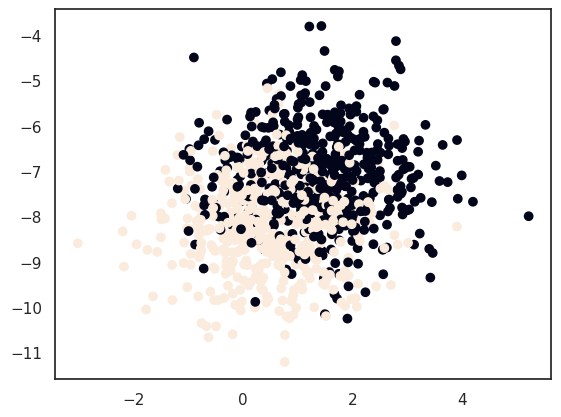

In [393]:
#trabajamos con datos ajenos a los nuestros solo para mostrar el manejo del modelo
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=1000, centers=2, n_features=10)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [394]:
#Importamos librería Naive Bayes
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train)
y_pred = NaiveBayes.predict(x_test)

In [395]:
#Evaluamos qué tan bueno es el clasificador
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

resultado = confusion_matrix(y_test, y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

[[198   0]
 [  0 202]]
True positives: 202
True negatives: 198
False positives: 0
False negative: 0
Precision:100.0%
Sensibilidad:100.0%
Especificidad:100.0%


# Sistema de procesamiento de imagenes con Machine Learning




In [396]:
#Ajeno al proyecto, solo para mostrar el uso de procesamiento de imagenes con ML

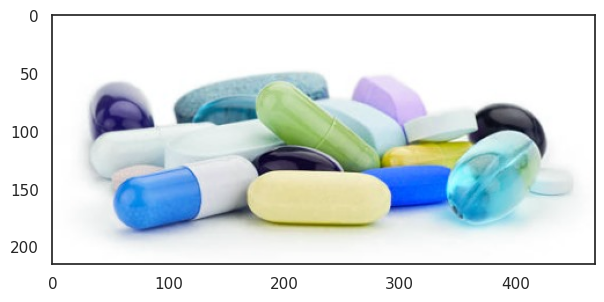

In [397]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Mostramos la imagen que vamos a utilizar
imagenPastillas = cv2.imread("/content/drive/MyDrive/Proyecto_BEDU/pastillas.jpg", cv2.IMREAD_COLOR)
imagen = cv2.cvtColor(imagenPastillas, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(7,7))
plt.imshow(imagenPastillas)
plt.show()


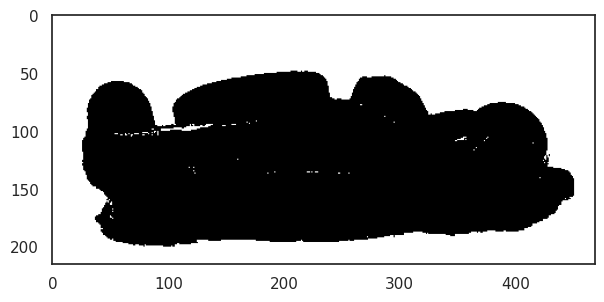

In [398]:
#Funciones para convertir a escala de grises y para binarizar respectivamente
def convertirAGrayScale(imagen):
    imagenGris = np.sum(imagen, axis = 2) / 3
    return imagenGris

def binarizar(imagenGris, threshold):
    imgBinaria = np.where(imagenGris > threshold, 255, 0)
    return imgBinaria

imagenPastillas_gris = convertirAGrayScale(imagenPastillas)
imagenPastillas_bin = binarizar(imagenPastillas_gris, 240)

#Imagen binarizada
plt.figure(figsize=(7,7))
plt.imshow(imagenPastillas_bin, cmap=plt.cm.gray)
plt.show()

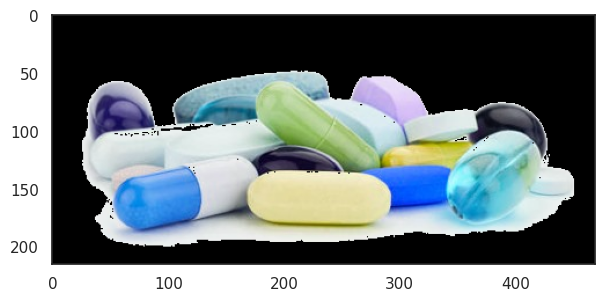

In [399]:
#Función para quitar el fondo de la imagen
def recortar(imgOriginal, imgBinarizada):
    patronBinario = np.where(imgBinarizada > 0, 0, 1)
    imgRecortada_rojo = np.multiply(imgOriginal[:,:,0],patronBinario)
    imgRecortada_verde = np.multiply(imgOriginal[:,:,1],patronBinario)
    imgRecortada_azul = np.multiply(imgOriginal[:,:,2],patronBinario)
    imgRecortada = np.dstack((imgRecortada_rojo, imgRecortada_verde, imgRecortada_azul))
    return imgRecortada

pastillas_recortar = recortar(imagenPastillas, imagenPastillas_bin)

#Imagen "recortada"
plt.figure(figsize=(7,7))
plt.imshow(pastillas_recortar)
plt.show()